Introduction

For my Project 2, I am going to use machine learning techniques to explore the predictors of high job creation within informal businesses in Bangladesh. I obtained my dataset (The Bangladesh informal firms survey 2010) from: https://sites.google.com/site/decrgdmckenzie/datasets 

Please find an extensive data dictionary here: http://microdata.worldbank.org/index.php/catalog/2244/datafile/F2/?offset=0&limit=100


Description of my data source (From: http://microdata.worldbank.org/index.php/catalog/2244/study-description)

This dataset was compiled from responses to a survey that was designed to collect data needed for the Dimensions of Informality in Bangladesh report. The survey was conducted between March and May 2010 by Data International Ltd., and covered 1724 enterprises. The sample frame for these enterprises was the EGI Census of 55,817 firms in randomly selected areas in urban parts of the 19 old districts of Bangladesh. The sample was stratified by firm size (in terms of full-time employment) and broad industry (manufacturing, trade or services), and was chosen to be representative of firms with 3 to 99 full-time workers in these areas. Oversampling of firms with 10-99 full-time workers was done to ensure sufficient sample sizes of these firms, which are less prevalent than firms with fewer workers. In practice 20 percent of the final sample were actually of size 1 or 2 workers, and 2 percent had more than 100 workers.

This dataset contains information on the characteristics of the informal firm and the owner. On the firm side, in addition to the standard balance sheet and income and expenditure data, a rich set of questions were used to obtain details on the process of formalization and the use of different business practices. On the owner side, in addition to standard demographic and educational information, the survey attempted to collect detail on owner characteristics which might affect the size of the business being run and the extent to which the owner formalizes.

Hypothesis 1

Good business practices (having a record-keeping system in place, frequently checking competitors' prices, negotiating with suppliers, etc.) will be relatively strong predictors of employment generation by informal businesses. 

Hypothesis 2

Having positive attitudes toward business formalization will be a relatively weak predictor of employment generation by informal businesses. 

In [83]:
## Package Imports

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [84]:
bangds = '/Users/sammanning/Desktop/ECON628-01-sjmanning/datasets/BGD_2010/informality_data_NEW.csv'

bang = pd.read_csv(bangds)

In [85]:
bang.head()

,slno,or,nob,gnd,dist,q1_1,s1_1_others,q1_2,q1_3a,q1_3b,...,q11_2b,q11_2c,q11_2d,q11_2e,q11_2f,q12_a,q12_b,q12_c,q12_d,q12_e
0,2,1,1,1,BARISAL,1,NaN,2811,30,50,...,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3
1,3,1,1,1,BARISAL,1,NaN,2812,60,60,...,NaN,NaN,NaN,NaN,NaN,3,3,3,3,3
2,4,2,1,1,BARISAL,1,NaN,2222,63,63,...,NaN,NaN,NaN,NaN,NaN,2,3,3,3,3
3,5,2,1,1,BARISAL,1,NaN,3610,56,56,...,NaN,NaN,NaN,NaN,NaN,2,2,2,3,3
4,6,1,1,1,BARISAL,1,NaN,1920,40,56,...,NaN,NaN,NaN,NaN,NaN,1,3,3,3,3


In [86]:
bang.tail()

,slno,or,nob,gnd,dist,q1_1,s1_1_others,q1_2,q1_3a,q1_3b,...,q11_2b,q11_2c,q11_2d,q11_2e,q11_2f,q12_a,q12_b,q12_c,q12_d,q12_e
1719,1721,1,3,1,TANGAIL,1,NaN,5232,54,54,...,1.0,1.0,2.0,1.0,1.0,2,3,2,3,3
1720,1722,1,3,1,TANGAIL,1,NaN,5233,2,12,...,1.0,2.0,2.0,1.0,1.0,1,1,1,3,3
1721,1723,1,3,1,TANGAIL,1,NaN,5233,0,0,...,1.0,2.0,2.0,1.0,1.0,2,2,2,3,3
1722,1724,1,3,1,TANGAIL,1,NaN,5231,14,14,...,1.0,1.0,2.0,1.0,1.0,2,2,3,3,3
1723,1725,2,3,1,TANGAIL,1,NaN,5234,45,45,...,1.0,1.0,2.0,2.0,1.0,2,2,3,3,3


In [87]:
bang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Columns: 331 entries, slno to q12_e
dtypes: float64(178), int64(152), object(1)
memory usage: 4.4+ MB


In [88]:
pd.set_option('display.height', 500)
pd.set_option('max_rows', 500)

height has been deprecated.



In [89]:
## Checking for null values

bang.isnull().sum(axis=0)

slno               0
or                 0
nob                0
gnd                0
dist               0
q1_1               0
s1_1_others     1724
q1_2               0
q1_3a              0
q1_3b              0
q1_4               0
s1_4_others     1724
q1_5               0
s1_5_others     1710
q1_6               0
q1_7               0
q1_8               0
q1_9            1520
s1_9_others     1724
q1_10m          1520
q1_10y          1520
q1_11m             0
q1_11y             0
q1_12a1a           0
q1_12a1b           0
q1_12a2a           0
q1_12a2b           0
q1_12a3a           0
q1_12a3b           0
q1_12a4a           0
q1_12a4b           0
q1_12a5a           0
q1_12a5b           0
q1_12b            98
q1_13              0
q1_14              0
q1_15              0
q1_16a             0
q1_16b             0
q2_1               0
q2_2               0
q2_3               0
q2_4               0
q2_5               0
q2_6               0
q2_7               0
q2_8               0
q3_1a        

In [90]:
## Dropping many variables that will not be useful for this study. 

bang1 = bang.drop(["s1_1_others","q1_3a","s1_4_others","s1_9_others","q1_15", "q2_2", "q2_3", 
                   "q2_5", "q2_6", "q2_7", "q3_1a", "q3_1b", "q3_3", "q3_4a", "q3_4b", "q3_4c",
                   "q3_5b1", "q3_5c1m", "q3_5c1y", "q3_5d1m", "q3_5d1m", "q3_5d1y", "q3_5a2",
                   "q3_5a2", "q3_5b2", "q3_5c2m", "q3_5c2y", "q3_5d2m", "q3_5d2y", "q3_5b3",
                   "q3_5c3m", "q3_5c3y", "q3_5d3m", "q3_5d3y", "q3_5b4", "q3_5c4m", "q3_5c4y",
                   "q3_5d4m", "q3_5d4y", "q3_5c5m", "q3_5c5y", "q3_5d5m", "q3_5d5y",
                   "s3_5others6", "q3_5a6", "q3_5c6m", "q3_5c6y", "q3_5d6m", "q3_5d6y", "q3_8",
                   "q3_9", "q4_1b1", "q4_1b2", "q4_1a3", "q4_1b3", "q4_1b6", "q4_2d", "q4_3",
                   "q4_5b", "q4_9", "q5_1a", "q5_1b", "q5_2", "q6_1b", "q6_1c", "q6_1d", "q6_4",
                   "s6_8oth", "q6_8_8", "q6_9_1", "q6_9_2", "q6_9_3", "q6_9_4", "q6_9_5",
                   "q6_9_6", "q6_9_7", "q6_9_8", "q6_9_9", "q6_9_10", "q6_9_11", "q6_9_12",
                   "q6_9_13", "q6_9_14", "q6_9_15", "s6_9oth", "q6_10a", "q6_10b", "q6_10c",
                   "q6_10d", "q6_10g", "q6_10f", "s610oth", "q6_10h", "q6_11", "q6_12b",
                   "q6_12c", "q6_12d", "q6_16", "s619oth", "q6_19_9", "q6_20_1", "q6_20_2",
                   "q6_20_3", "q6_20_4", "q6_20_5", "q6_20_6", "q6_20_7", "q6_20_8", "q6_20_9", 
                   "q6_20_10", "q6_20_11", "q6_20_12", "q6_20_13", "q6_20_14", "s6_20oth", 
                   "q6_20_15", "q6_21yr", "q6_21a", "q6_21b", "q6_21c", "q6_22", "q6_24_a",
                   "q6_24_c", "q6_26a", "q6_26b", "q7_4a", "q7_4b", "q7_4c", 
                   "q7_4d", "q7_4e", "q7_4f", "q7_4g", "s7_4g_others", "q7_5", "q7_6a", "q7_8",
                   "q7_9", "s7_9_others", "q7_11", "q7_12a", "q7_12b", "q7_12c", "q7_12d",
                   "q7_13a", "q7_14", "q7_18", "q7_22a", "q7_23", "q7_25a", "q7_26", "q7_27_a",
                   "q7_27_b", "q7_27_c", "q7_27_d", "s7_9oth", "q7_27_e", "q7_27_f", "q7_28", 
                   "q8_1oth", "q9_2", "q10_1a", "q10_1b", "q10_1c", "q10_1d", "q10_1e", 
                   "q10_1f", "q10_2a", "q10_3_1", "q10_3_2", "q10_3_3", "q10_3_4", "q10_3_5", 
                   "q10_3_6", "q10_4", "q10_5", "q10_6", "q11_2a", "q11_2b", "q11_2c", "q11_2d", 
                   "q11_2e", "q11_2f", "q12_a", "q12_b", "q12_c", "q12_d", "q12_e", "q1_5", "s1_5_others"],axis=1)

In [91]:
## Renaming variables based on the information they give.

bang1.rename(columns={
        'q1_1':'legal_status',
        'q1_2':'nature_of_biz',
        'q1_3b':'owner_hrs_perweek',
        'q1_4':'biz_site',
        'q1_6':'biz_site_famowned',
        'q1_7':'have_legal_title',
        'q1_8':'inherited_dumm',
        'q1_9':'not_from_scratch',
        'q1_10m':'month_taken_over',
        'q1_10y':'yr_taken_over',
        'q1_11y':'yr_biz_began',
        'q1_11m':'month_biz_began',
        'q1_12a1a':'current_num_sal_workers',
        'q1_12a2a':'current_num_daily_workers',
        'q1_12a2b':'num_daily_workers_atbeg',
        'q1_12a1b':'num_sal_workers_atbeg',
        'q1_12a3a':'current_num_partners',
        'q1_12a3b':'num_partners_atbeg',
        'q1_12a4a':'current_num_unpaid_workers',
        'q1_12a4b':'num_unpaid_workers_atbeg',
        'q1_12a5a':'current_num_tot_workers',
        'q1_12a5b':'tot_num_workers_atbeg',
        'q1_12b':'employ_contract',
        'q1_13':'owner_age',
        'q1_14':'owner_sex',
        'q1_16a':'adults_in_hh',
        'q1_16b':'children_in_hh',
        'q2_1':'owner_educ',
        'q2_4':'num_prior_jobs',
        'q2_5':'legal_status',
        'q2_8':'childhood_pov',
        'q3_2':'bank_accnt',
        'q3_5a1':'priv_loan_ever',
        'q3_5a3':'mfi_loan_ever',
        'q3_5a4':'mny_lender_ever',
        'q3_5a5':'fam_friend_loan_ever',
        'q3_6':'perc_inputs_oncredit',
        'q3_7':'perc_sales_oncredit',
        'q4_1a1':'value_if_own_tools',
        'q4_1a2':'value_if_own_machinery',
        'q4_1a4':'value_if_own_vehicle',
        'q4_1b4':'mnthly_rent_4_vehicle',
        'q4_1a5':'value_if_own_biz_property',
        'q4_1b5':'mnthly_rent',
        'q4_1a6':'value_if_own_othr_assets',
        'q4_1a7':'value_owned_biz_assets',
        'q4_1b7':'value_mnthly_rent_assets',
        'q4_2a':'own_biz_cell',
        'q4_2b':'own_biz_comp',
        'q4_2c':'own_cc_mach',
        'q4_4':'mkt_value_current_inventory',
        'q4_5a':'mnthly_amnt_spent_items_4_resale',
        'q4_5c':'interest_paid_last_month',
        'q4_5d':'wage_sal_last_month',
        'q4_5e':'rent_last_month',
        'q4_5f':'taxes_last_month',
        'q4_5g':'other_exp_last_month',
        'q4_5h':'total_exp_last_month',
        'q4_6':'total_sales_last_month',
        'q4_7':'annual_sales_09',
        'q4_8':'annual_sales_08',
        'q4_10':'tot_prof_last_month',
        'q4_11':'tot_inc_last_month',
        'q4_12':'perc_sales_as_exports',
        'q5_1':'new_prod_serv_last_3yrs',
        'q5_3':'improv_prod_last_3yrs',
        'q5_4':'improv_process_last_3yrs',
        'q5_5':'what_new_process',
        'q5_6a':'have_biz_website',
        'q5_6b':'have_biz_email',
        'q6_1':'have_trade_license',
        'q6_1a':'yrs_in_op_when_took_over',
        'q6_2':'consider_registering_biz',
        'q6_3a':'official_license_cost',
        'q6_3b':'unofficial_license_cost',
        'q6_5':'bribes_in_pastyr_no_lic',
        'q6_6':'bribe_amnt_pastyr_no_lic',
        'q6_7':'if_free_would_get_license',
        'q6_8_1':'reg_expensive',
        'q6_8_2':'reg_time_consum',
        'q6_8_3':'reg_burdensome',
        'q6_8_4':'risk_tax_audit',
        'q6_8_5':'have_to_pay_taxes',
        'q6_8_6':'risk_inspection',
        'q6_8_7':'more_paperwork',
        'q6_8_9':'no_disadvantage_of_license',
        'q6_9_16':'no_benefits_of_license',
        'q6_10e':'visits_by_police_09',
        'q6_12':'biz_have_tax_id_cert',
        'q6_12a':'yrs_biz_in_op_when_acquired',
        'q6_13':'considered_getting_TIN',
        'q6_14a':'official_TIN_cost',
        'q6_14b':'unofficial_TIN_cost',
        'q6_15':'est_annual_taxes_if_got_TIN',
        'q6_17':'bribes_in_pastyr_no_TIN',
        'q6_17a':'bribe_amnt_patyr_no_TIN',
        'q6_18':'if_free_would_get_TIN',
        'q6_19_1':'TIN_expensive',
        'q6_19_3':'TIN_time_consum',
        'q6_19_2':'unoffic_costs_exp_TIN',
        'q6_19_4':'TIN_burdensome',
        'q6_19_5':'risk_tax_audit_TIN',
        'q6_19_6':'have_to_pay_taxes_TIN',
        'q6_19_7':'risk_inspection_TIN',
        'q6_19_8':'more_paperwork_TIN',
        'q6_19_10':'no_disadvantage_of_TIN',
        'q6_20_16':'no_benefits_of_TIN',
        'q6_21':'registered_for_VAT',
        'q6_23':'have_sanitation_permit',
        'q6_24_b':'biz_assoc_member',
        'q6_25':'extortion_dumm',
        'q6_25a':'extortion_value',
        'q7_1a':'check_prices',
        'q7_1b':'check_products',
        'q7_1c':'ask_prod_reqs',
        'q7_1d':'speak_w_former',
        'q7_1e':'speak_w_supplier',
        'q7_2':'spec_offers',
        'q7_3':'advert_dumm',
        'q7_6':'neg_w_supplier',
        'q7_7':'compare_alt_supp',
        'q7_10':'outofstock_freq',
        'q7_13':'have_recrdkping_syst',
        'q7_15':'biz_record',
        'q7_16':'rec_of_every_sale',
        'q7_17':'rec_to_track_cash',
        'q7_19':'know_cost_each_prd',
        'q7_20':'know_prof_prd',
        'q7_21':'have_budget',
        'q7_22':'sell_on_credit_dumm',
        'q7_24':'review_perf_freq',
        'q7_25':'sales_goal_dumm',
        'q8_1':'expect_in_5yrs',
        'q8_2':'num_emp_in_5yrs',
        'q9_1':'risk_1_10',
        'q10_2':'num_firms_nearby',
        'q11_1':'have_sign',
        'q11_1a':'sign1_bright_2_old',
    }, inplace=True)

In [92]:
bang1.describe()

,slno,or,nob,gnd,legal_status,nature_of_biz,owner_hrs_perweek,biz_site,biz_site_famowned,have_legal_title,...,have_budget,sell_on_credit_dumm,review_perf_freq,sales_goal_dumm,expect_in_5yrs,num_emp_in_5yrs,risk_1_10,num_firms_nearby,have_sign,sign1_bright_2_old
count,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,...,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1724.000000,1267.000000
mean,863.500000,1.199536,2.223898,1.014501,1.140371,4692.599188,50.595708,4.740719,1.205916,1.768561,...,1.505220,1.236079,2.562065,1.638631,1.203016,251.793503,6.124130,121.987819,1.265661,1.171271
std,497.820249,0.399768,0.859070,0.119579,0.442930,1649.081699,19.086376,1.711845,0.434910,0.421874,...,0.500118,0.424794,1.055170,0.480537,0.594492,421.338756,2.868914,314.294795,0.441813,0.376894
min,2.000000,1.000000,1.000000,1.000000,1.000000,1514.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,432.750000,1.000000,1.000000,1.000000,1.000000,3691.000000,42.000000,4.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,5.000000,10.000000,1.000000,NaN
50%,863.500000,1.000000,3.000000,1.000000,1.000000,5220.000000,54.000000,4.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,15.000000,6.000000,30.000000,1.000000,NaN
75%,1294.250000,1.000000,3.000000,1.000000,1.000000,5239.000000,60.000000,4.000000,1.000000,2.000000,...,2.000000,1.000000,4.000000,2.000000,1.000000,200.000000,9.000000,100.000000,2.000000,NaN
max,1725.000000,2.000000,3.000000,2.000000,5.000000,9309.000000,110.000000,10.000000,3.000000,2.000000,...,2.000000,2.000000,4.000000,2.000000,5.000000,3000.000000,10.000000,7000.000000,2.000000,2.000000


In [93]:
bang1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Columns: 144 entries, slno to sign1_bright_2_old
dtypes: float64(46), int64(97), object(1)
memory usage: 1.9+ MB


In [94]:
#Dropping columns that have more than 1/2 missing values

## Using code found here: http://stackoverflow.com/questions/30923324/pandas-dataframe-drop-columns-by-number-of-nan

bang1.dropna(thresh=862, axis=1, inplace=True)
bang1.isnull().sum(axis=0)

slno                                  0
or                                    0
nob                                   0
gnd                                   0
dist                                  0
legal_status                          0
nature_of_biz                         0
owner_hrs_perweek                     0
biz_site                              0
biz_site_famowned                     0
have_legal_title                      0
inherited_dumm                        0
month_biz_began                       0
yr_biz_began                          0
current_num_sal_workers               0
num_sal_workers_atbeg                 0
current_num_daily_workers             0
num_daily_workers_atbeg               0
current_num_partners                  0
num_partners_atbeg                    0
current_num_unpaid_workers            0
num_unpaid_workers_atbeg              0
current_num_tot_workers               0
tot_num_workers_atbeg                 0
employ_contract                      98


In [95]:
bang1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Columns: 111 entries, slno to sign1_bright_2_old
dtypes: float64(13), int64(97), object(1)
memory usage: 1.5+ MB


In [96]:
## That dropped 33 columns. 

In [97]:
## Dropping observations that have more than 1/2 missing values.

bang1.dropna(thresh=53, axis=0, inplace=True)
bang1.isnull().sum(axis=0)

slno                                  0
or                                    0
nob                                   0
gnd                                   0
dist                                  0
legal_status                          0
nature_of_biz                         0
owner_hrs_perweek                     0
biz_site                              0
biz_site_famowned                     0
have_legal_title                      0
inherited_dumm                        0
month_biz_began                       0
yr_biz_began                          0
current_num_sal_workers               0
num_sal_workers_atbeg                 0
current_num_daily_workers             0
num_daily_workers_atbeg               0
current_num_partners                  0
num_partners_atbeg                    0
current_num_unpaid_workers            0
num_unpaid_workers_atbeg              0
current_num_tot_workers               0
tot_num_workers_atbeg                 0
employ_contract                      98


In [98]:
bang1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 0 to 1723
Columns: 111 entries, slno to sign1_bright_2_old
dtypes: float64(13), int64(97), object(1)
memory usage: 1.5+ MB


In [99]:
## No observations were dropped. 

In [100]:
## Checking the data types that I am working with

bang1.dtypes

slno                                  int64
or                                    int64
nob                                   int64
gnd                                   int64
dist                                 object
legal_status                          int64
nature_of_biz                         int64
owner_hrs_perweek                     int64
biz_site                              int64
biz_site_famowned                     int64
have_legal_title                      int64
inherited_dumm                        int64
month_biz_began                       int64
yr_biz_began                          int64
current_num_sal_workers               int64
num_sal_workers_atbeg                 int64
current_num_daily_workers             int64
num_daily_workers_atbeg               int64
current_num_partners                  int64
num_partners_atbeg                    int64
current_num_unpaid_workers            int64
num_unpaid_workers_atbeg              int64
current_num_tot_workers         

All of my key variables are integers or floats, and many of them are continous. Taking that into consideration, plus the fact that this dataset has a somewhat large sample considering the question I am trying to answer, replacing missing values with the mean value for that column is appropriate.

In [101]:
#Defining a new function here to fill missing values with the mean. Code source: Mario Carillo

def missing_values(data):
    if data.isnull().sum() > 0:
        print "Number of missing values replaced with mean = ", data.isnull().sum()
        data.fillna(np.mean(data), inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values = 0"

In [102]:
missing_values(bang1.employ_contract)

Number of missing values replaced with mean =  98


In [103]:
missing_values(bang1.outofstock_freq)

Number of missing values replaced with mean =  94


In [104]:
missing_values(bang1.no_disadvantage_of_license)

Number of missing values replaced with mean =  442


In [105]:
missing_values(bang1.rent_last_month)

Number of missing values replaced with mean =  1


In [106]:
missing_values(bang1.mkt_value_current_inventory)

Number of missing values replaced with mean =  89


In [107]:
missing_values(bang1.mnthly_rent)

Number of missing values replaced with mean =  1


In [108]:
missing_values(bang1.sign1_bright_2_old)

Number of missing values replaced with mean =  457


In [109]:
missing_values(bang1.rec_of_every_sale)

Number of missing values replaced with mean =  415


In [110]:
missing_values(bang1.rec_to_track_cash)

Number of missing values replaced with mean =  416


In [111]:
missing_values(bang1.considered_getting_TIN)

Number of missing values replaced with mean =  802


In [112]:
missing_values(bang1.bribes_in_pastyr_no_TIN)

Number of missing values replaced with mean =  802


In [113]:
missing_values(bang1.if_free_would_get_TIN)

Number of missing values replaced with mean =  803


In [114]:
missing_values(bang1.have_recrdkping_syst)

Number of missing values replaced with mean =  857


In [115]:
bang1.isnull().sum(axis=0)

slno                                0
or                                  0
nob                                 0
gnd                                 0
dist                                0
legal_status                        0
nature_of_biz                       0
owner_hrs_perweek                   0
biz_site                            0
biz_site_famowned                   0
have_legal_title                    0
inherited_dumm                      0
month_biz_began                     0
yr_biz_began                        0
current_num_sal_workers             0
num_sal_workers_atbeg               0
current_num_daily_workers           0
num_daily_workers_atbeg             0
current_num_partners                0
num_partners_atbeg                  0
current_num_unpaid_workers          0
num_unpaid_workers_atbeg            0
current_num_tot_workers             0
tot_num_workers_atbeg               0
employ_contract                     0
owner_age                           0
owner_sex   

In [116]:
## Looking at the distribution of some important variables. 
bang1.annual_sales_08.describe()

count    1.724000e+03
mean     1.043231e+07
std      5.646849e+07
min      0.000000e+00
25%      5.145000e+05
50%      1.700000e+06
75%      5.000000e+06
max      1.820000e+09
Name: annual_sales_08, dtype: float64

In [117]:
bang1.num_firms_nearby.describe()

count    1724.000000
mean      121.987819
std       314.294795
min         0.000000
25%        10.000000
50%        30.000000
75%       100.000000
max      7000.000000
Name: num_firms_nearby, dtype: float64

In [118]:
bang1.owner_educ.describe()

count    1724.000000
mean        4.011021
std         1.602159
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: owner_educ, dtype: float64

In [119]:
bang1.current_num_tot_workers.describe()

count    1724.000000
mean       13.075406
std        73.299884
min         0.000000
25%         2.000000
50%         4.000000
75%        10.000000
max      2330.000000
Name: current_num_tot_workers, dtype: float64

In [120]:
## From the data dictionary online, I know that for one of the questions
## about what year the business began, if respondents did not know, then
## their response was coded as 999. This only happened ten times, but 
## this is an important variable for further analysis, so I am going
## to remove those observations with the code below. 

bang1 = bang1[(bang1.yr_biz_began != 999)]

In [121]:
## Defining a function to use to create histograms for different variables.

def histogram_plotter(title, data):
   sns.set(rc={"figure.figsize": (8, 6)})
   sns.set_style('white')
   dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})
   
   dist.axvline(np.mean(data), lw=1, c='green', ls='dashed')
   average_roll = '{0:.2f}'.format(np.mean(data))
   title = 'Distribution of ' + title + '; average = '  + average_roll + '\n'
   dist.set_title(title, fontsize=16)
   dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':1})

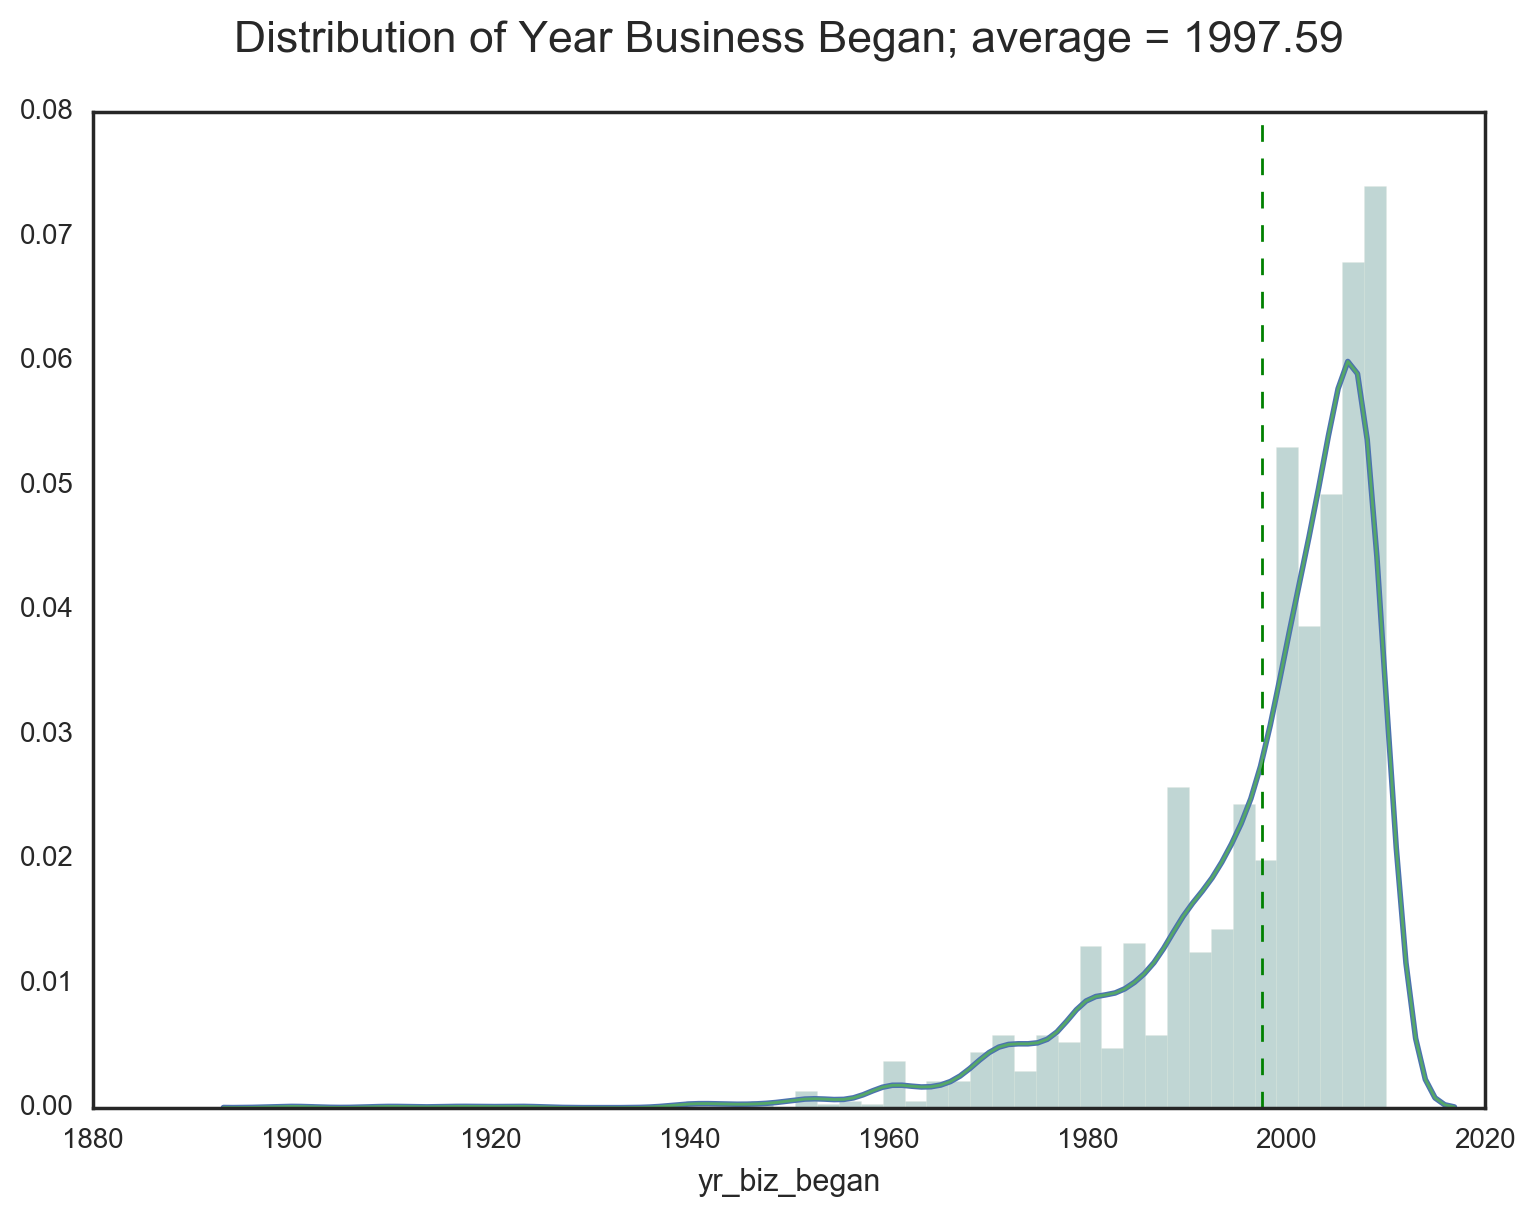

In [122]:
histogram_plotter("Year Business Began", bang1.yr_biz_began)

In [123]:
## Creating outcome variables. First step is to know how long each business has been running,
## so that I can create an outcome variables that accounts for rates of change in employment.

## Code below creates a metric for the number of jobs that each firm has created per year since starting business.
## This will be my main outcome metric.

bang1['biz_age'] = 2010 - bang1['yr_biz_began']
bang1['job_growth_py'] = ((bang1['current_num_tot_workers'] - bang1['tot_num_workers_atbeg']) / bang1['biz_age'])

In [124]:
## Creating performance metric for growth in sales.

bang1['2010_annual_sale_est'] = (bang1['total_sales_last_month'])*12
bang1['change_in_sales'] = (bang1['2010_annual_sale_est']) - (bang1['annual_sales_08'])

In [125]:
missing_values(bang1.job_growth_py)

Number of missing values replaced with mean =  1


In [126]:
## Looking at the distribution of different potentially important dependent variables.

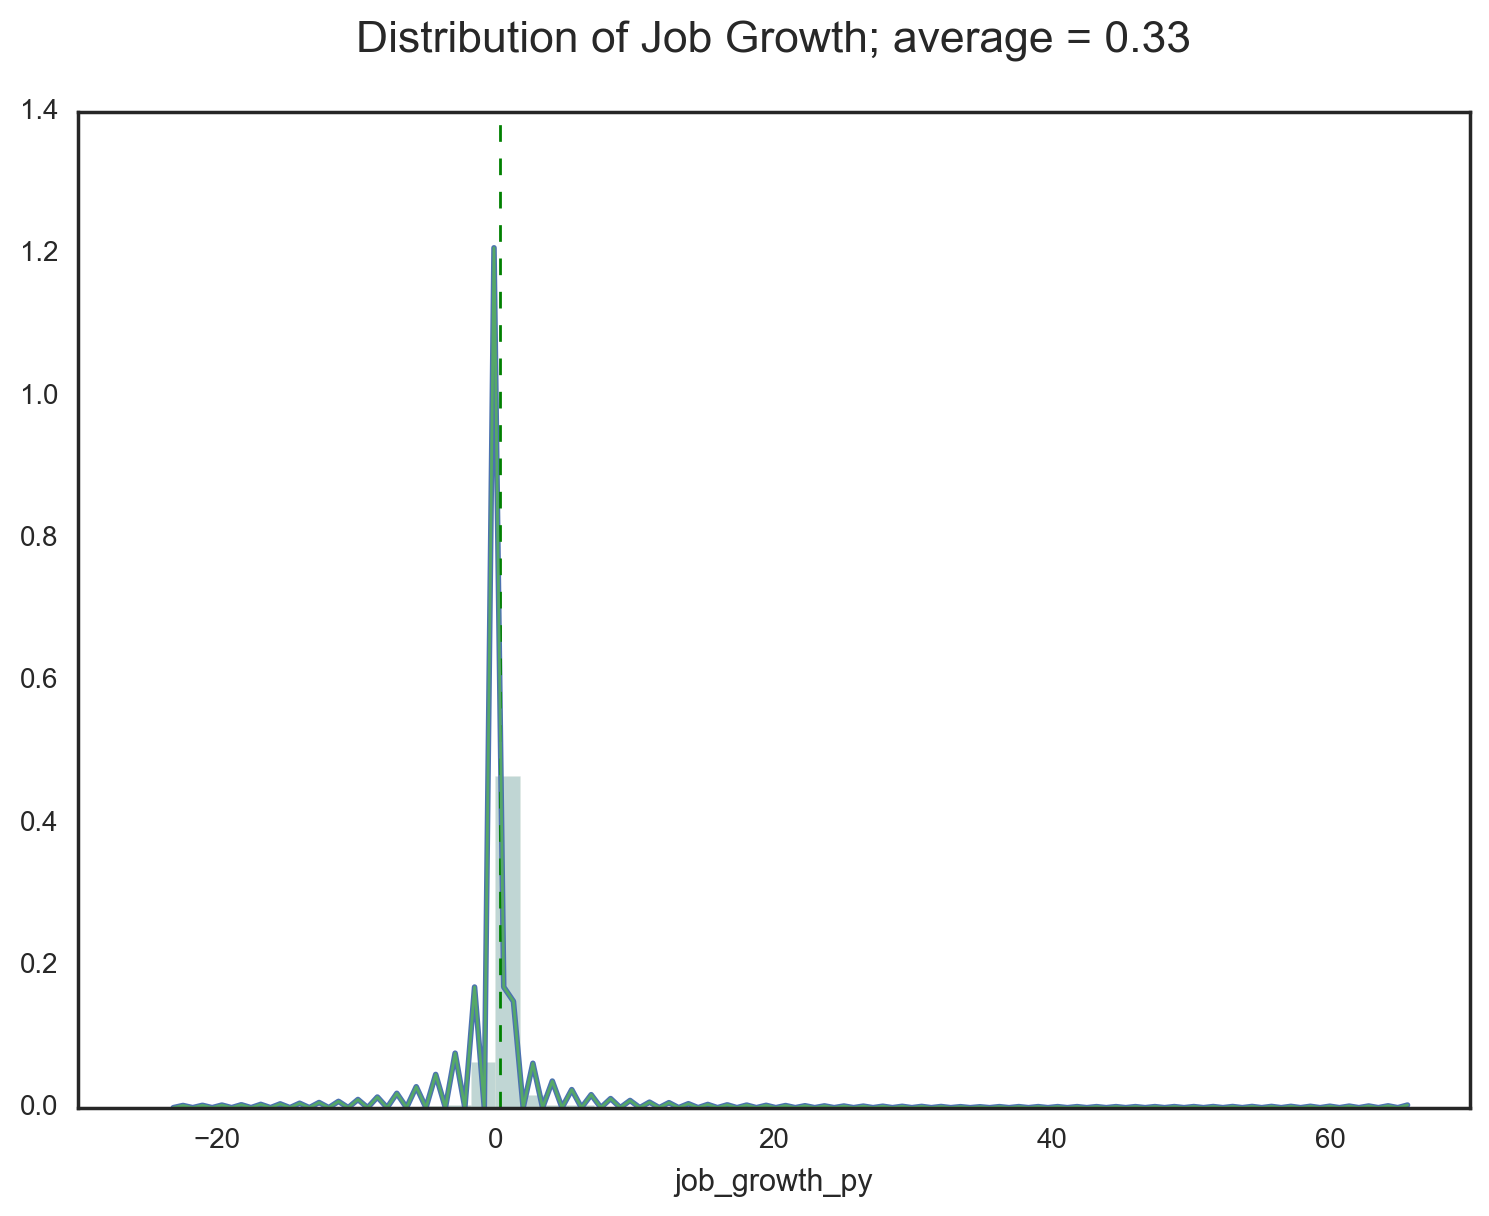

In [127]:
histogram_plotter("Job Growth", bang1.job_growth_py)

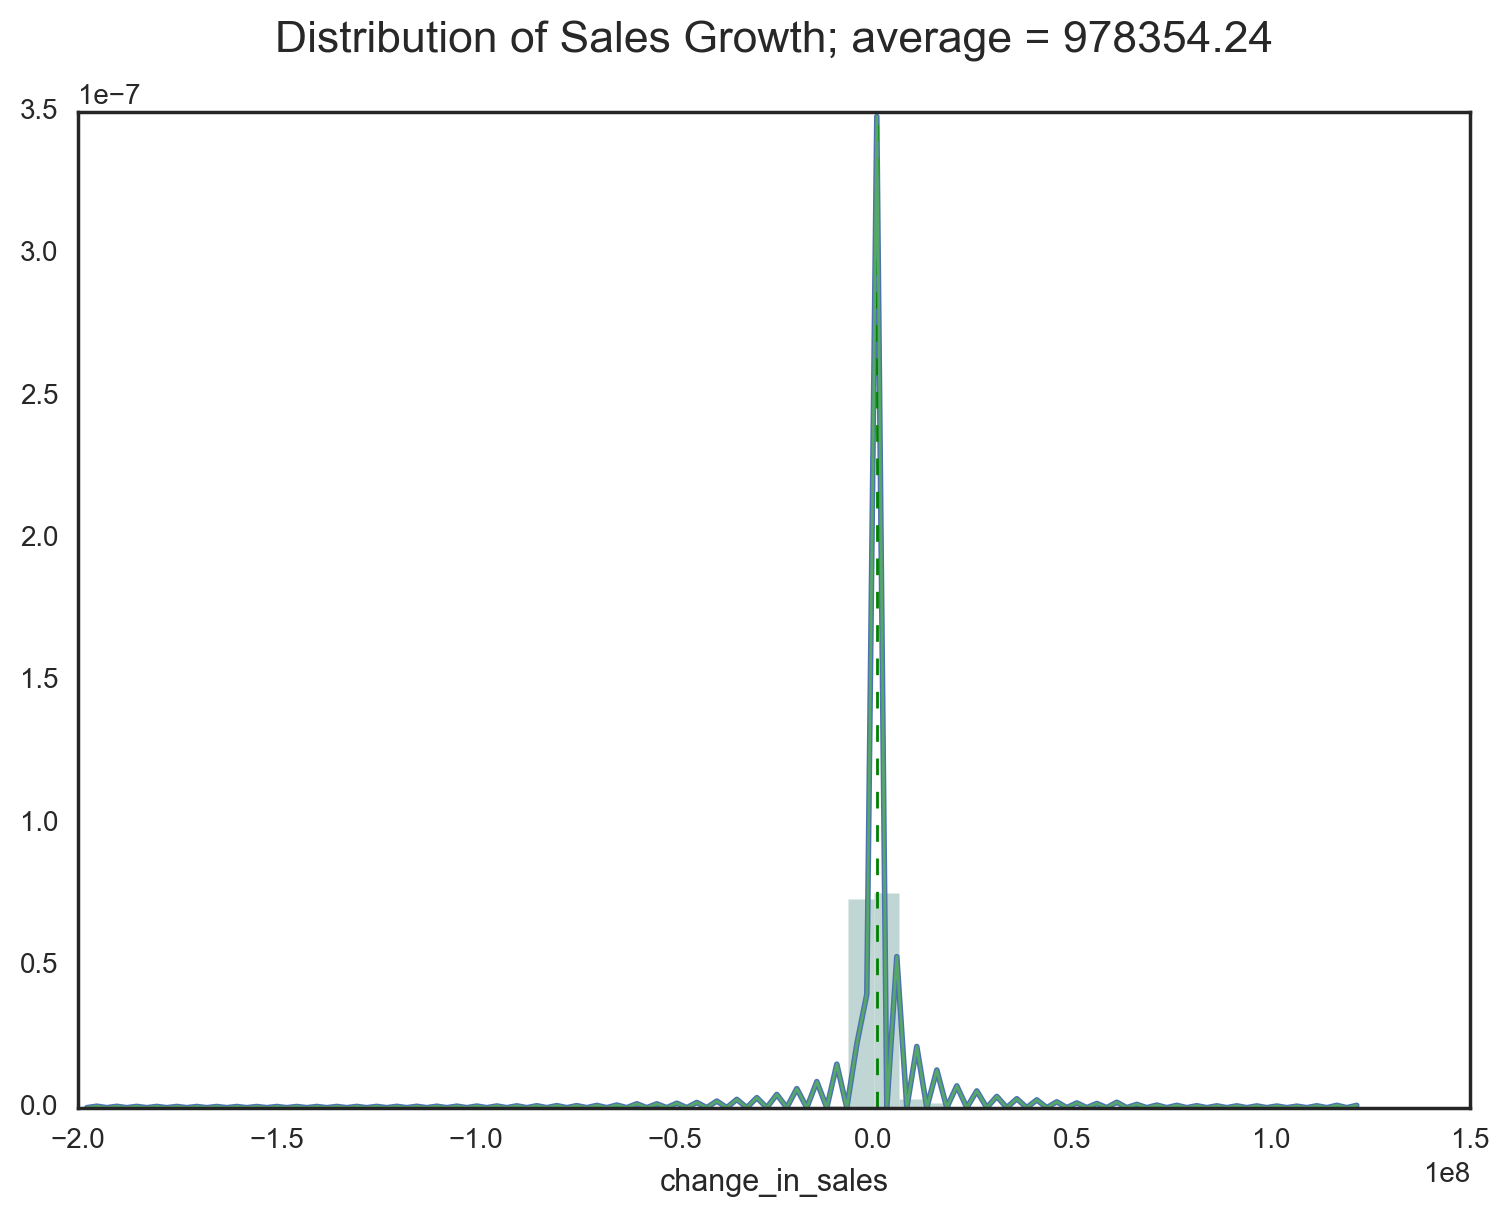

In [128]:
histogram_plotter("Sales Growth", bang1.change_in_sales)

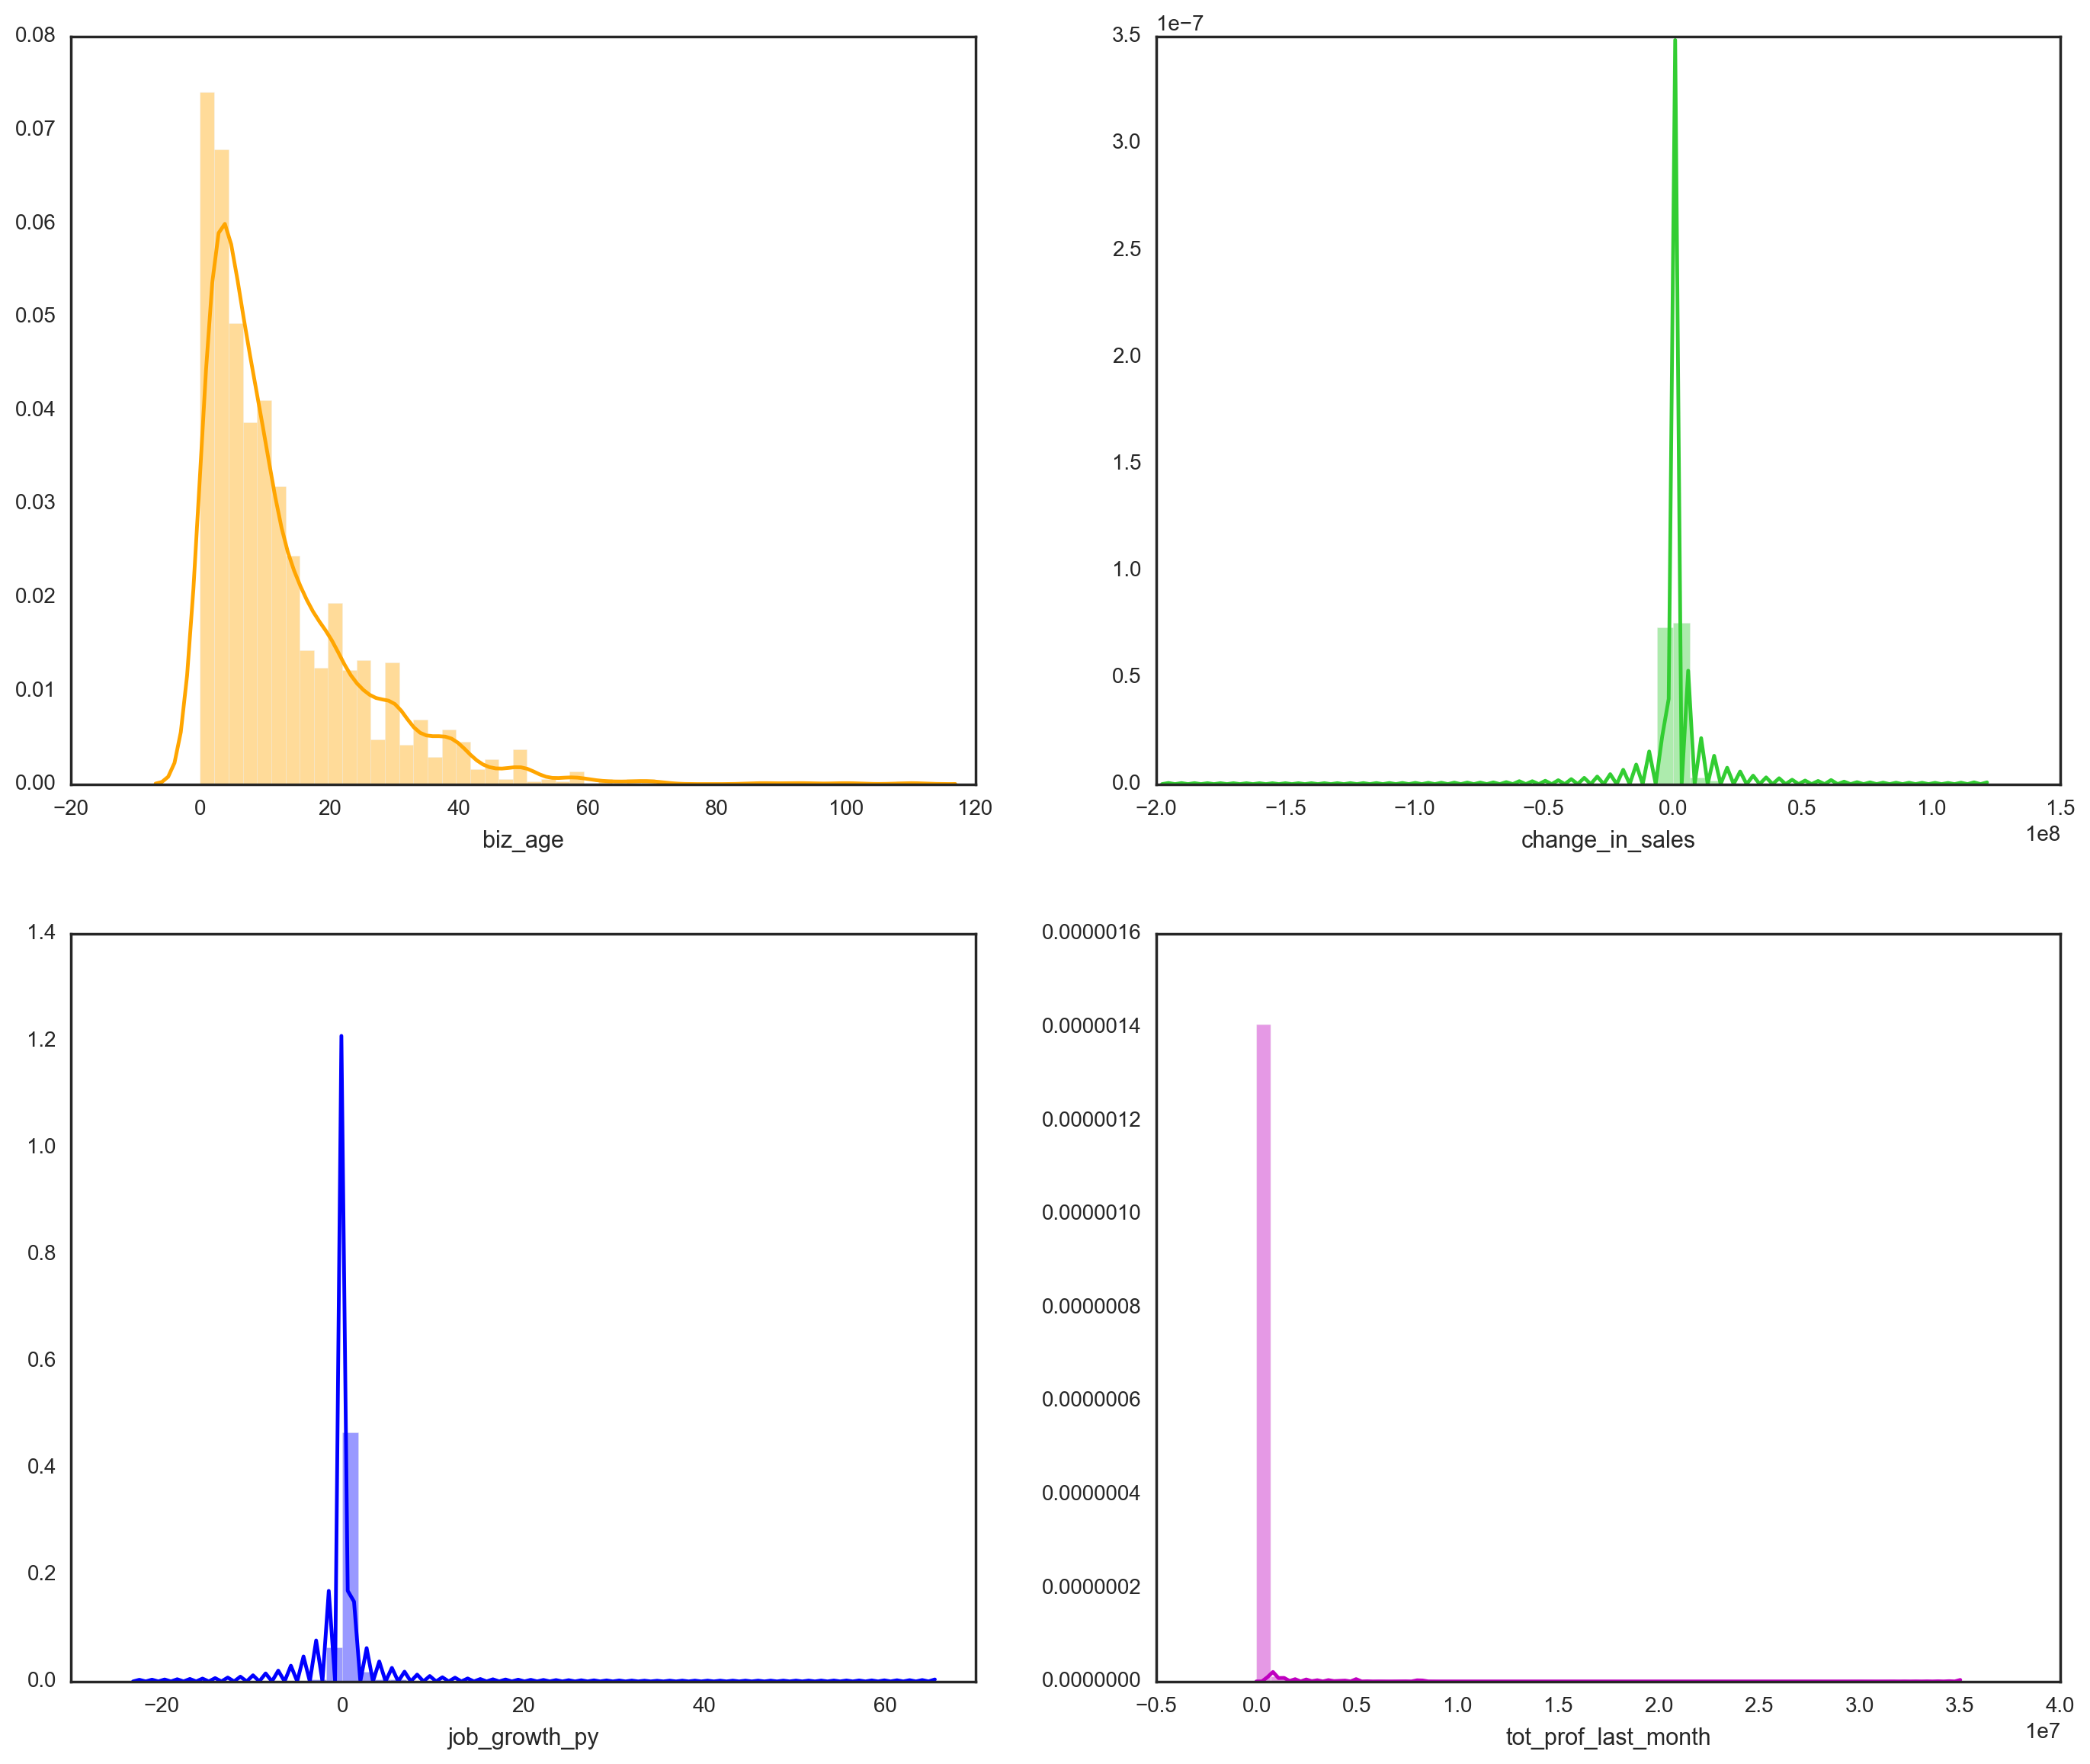

In [129]:
fig, axarr = plt.subplots(2, 2, figsize=(15,13),
                         sharex=False, sharey=False)

axarr[0,0] = sns.distplot(bang1.biz_age ,ax=axarr[0,0], color='orange')

axarr[0,1] = sns.distplot(bang1.change_in_sales ,ax=axarr[0,1], color='limegreen')       
                          
axarr[1,0] = sns.distplot(bang1.job_growth_py, ax=axarr[1,0], color='blue')

axarr[1,1] = sns.distplot(bang1.tot_prof_last_month, ax=axarr[1,1], color='m')


Of the three measures of business performance in plots 2-4 above, we can see that all three have metrics that are very heavily centered at zero, indicating subsistence level profits and low rates of job creation. This is to be expected, since it is well known that small informal businesses in the developing world operate at subsistence and rarely graduate into "transformational" businesses that make high enough profits to generate jobs for others outside of the business owner's family. (See Schoar (2010) for more on this topic: http://aschoar.scripts.mit.edu/aschoar2016/wp-content/uploads/2016/07/SubsistenceVsTransformationalEntrepreneurs.pdf)

The goal of this analysis will then be to see if there are any strong predictors of job creation within informal firms, even if the variation across firms is small. 

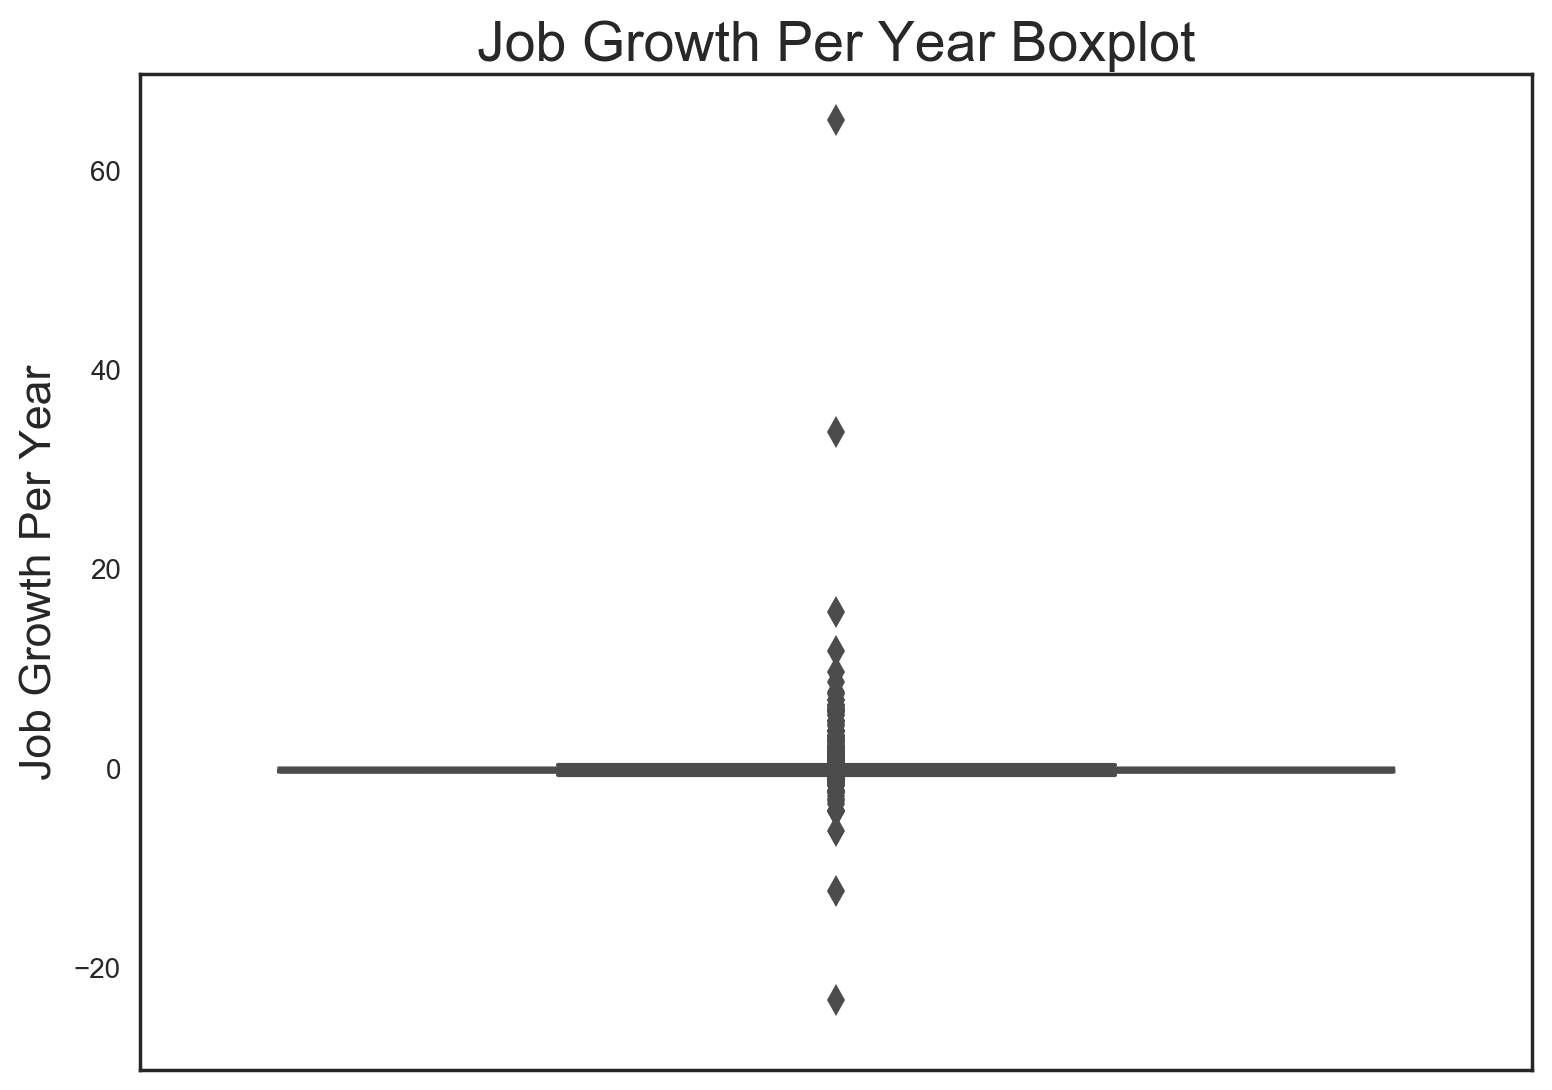

In [130]:
## Let's take some steps to remove outliers.
## Boxplot below provides a better picture of outliers in the job growth metric 
## that I created.

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(bang1.job_growth_py, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Job Growth Per Year', fontsize=16)
ax.set_title('Job Growth Per Year Boxplot', fontsize=20)

plt.show()

job_growth_py mean: 0.331145783672
job_growth_py std: 2.18393451719


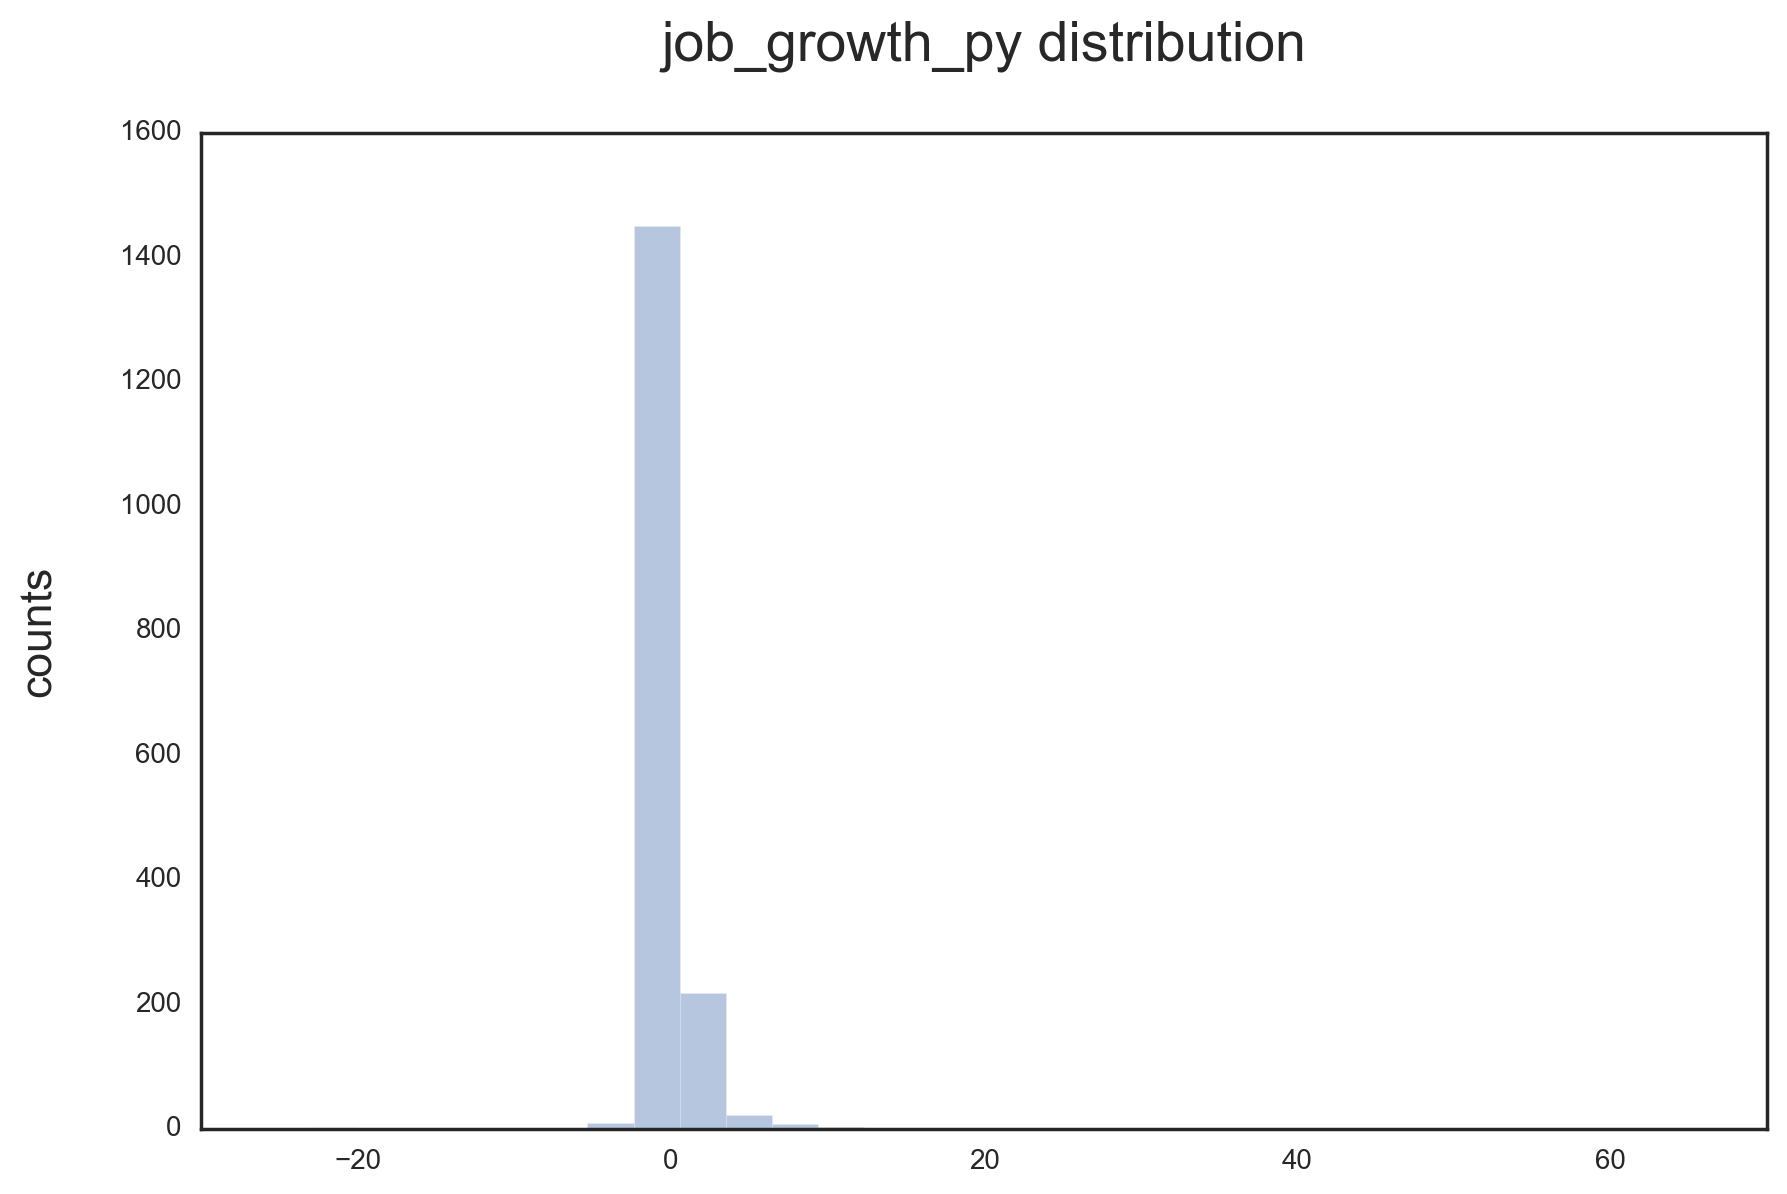

In [131]:
## Now I'm going to remove some of the outliers for the key overall performance variable for job growth. 
## First step is to create a variable for the mean and standard deviation.

job_growth_py = bang1.job_growth_py.values

job_growth_py_mean = np.mean(job_growth_py)
job_growth_py_std = np.std(job_growth_py)

print 'job_growth_py mean:', job_growth_py_mean
print 'job_growth_py std:', job_growth_py_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(job_growth_py, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('job_growth_py distribution\n', fontsize=20)

plt.show()

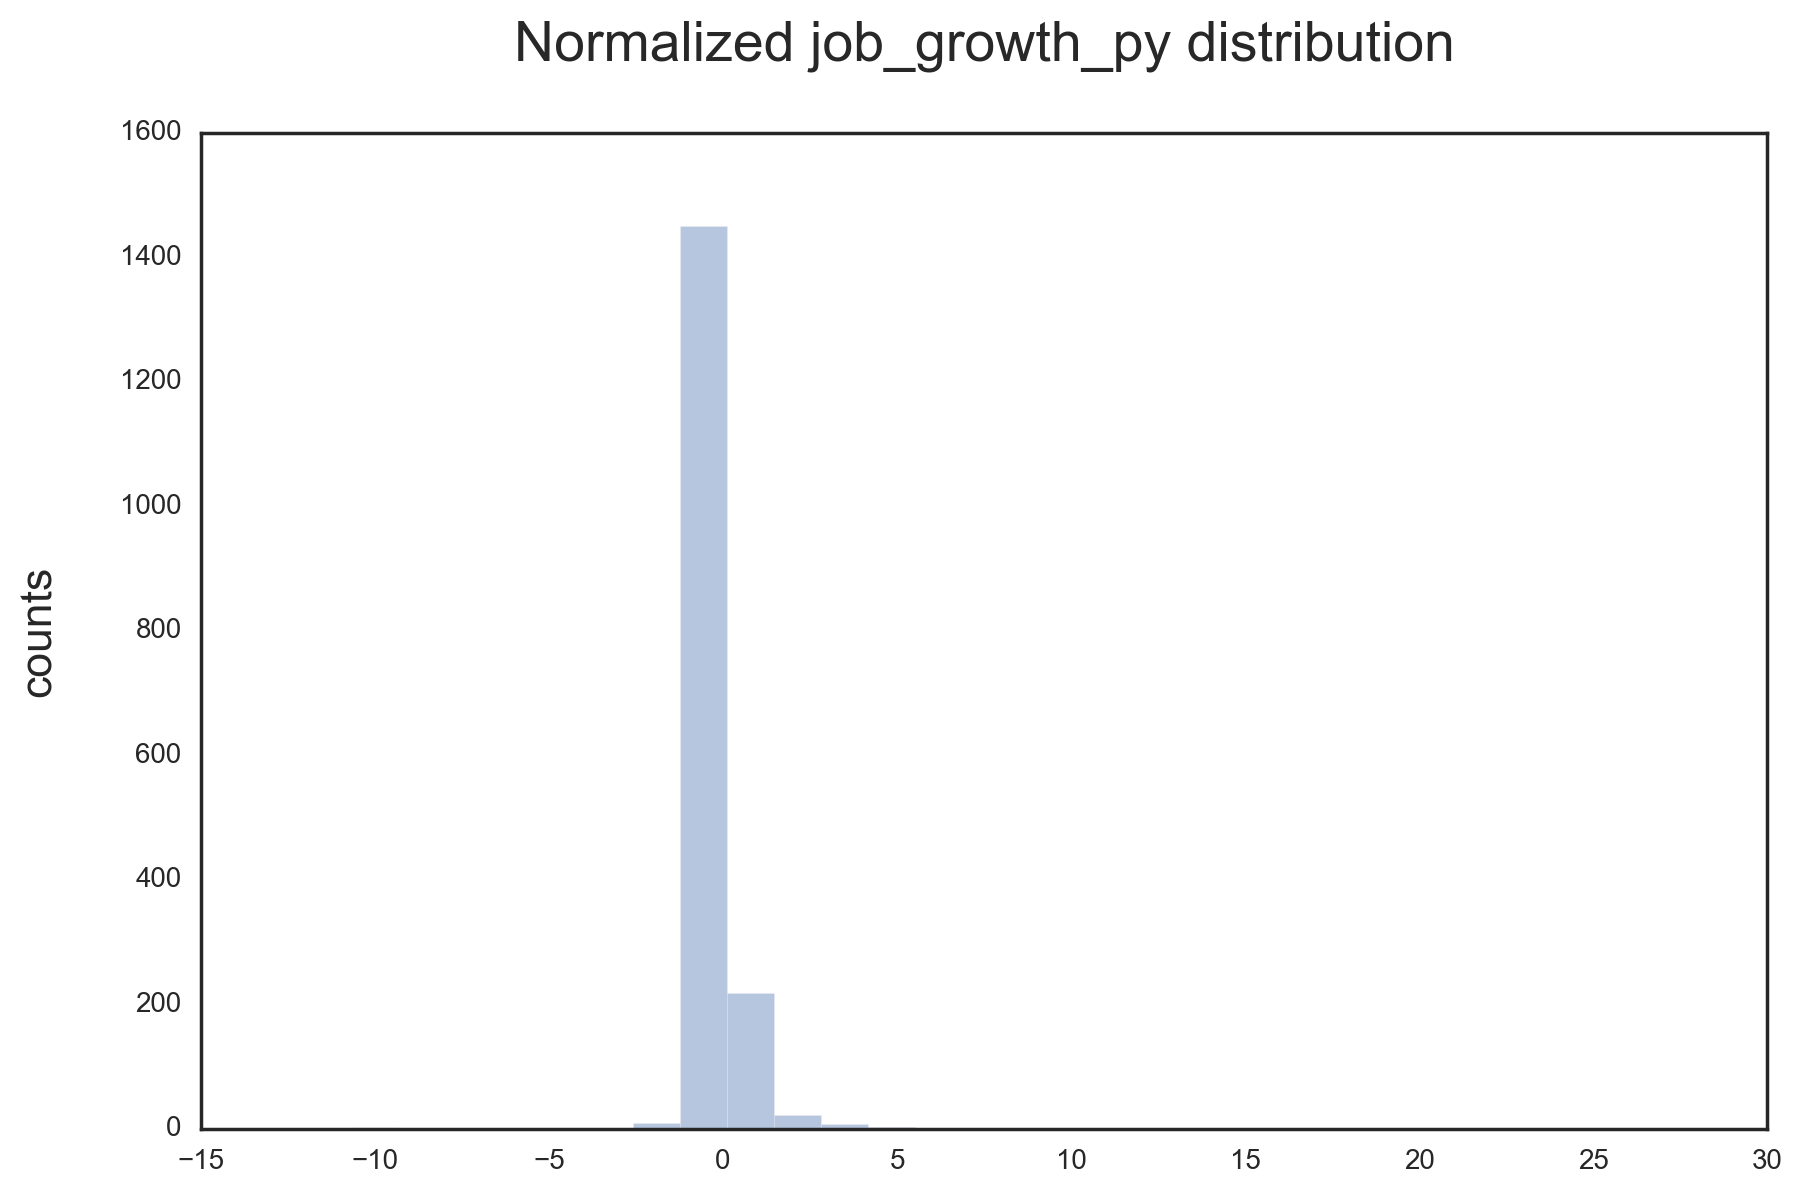

In [132]:
#Now I'll plot the normalized distribution of job growth per year.

job_growth_py_norm = (job_growth_py - job_growth_py_mean) / job_growth_py_std

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(job_growth_py_norm, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized job_growth_py distribution\n', fontsize=20)

plt.show()

1714
1707


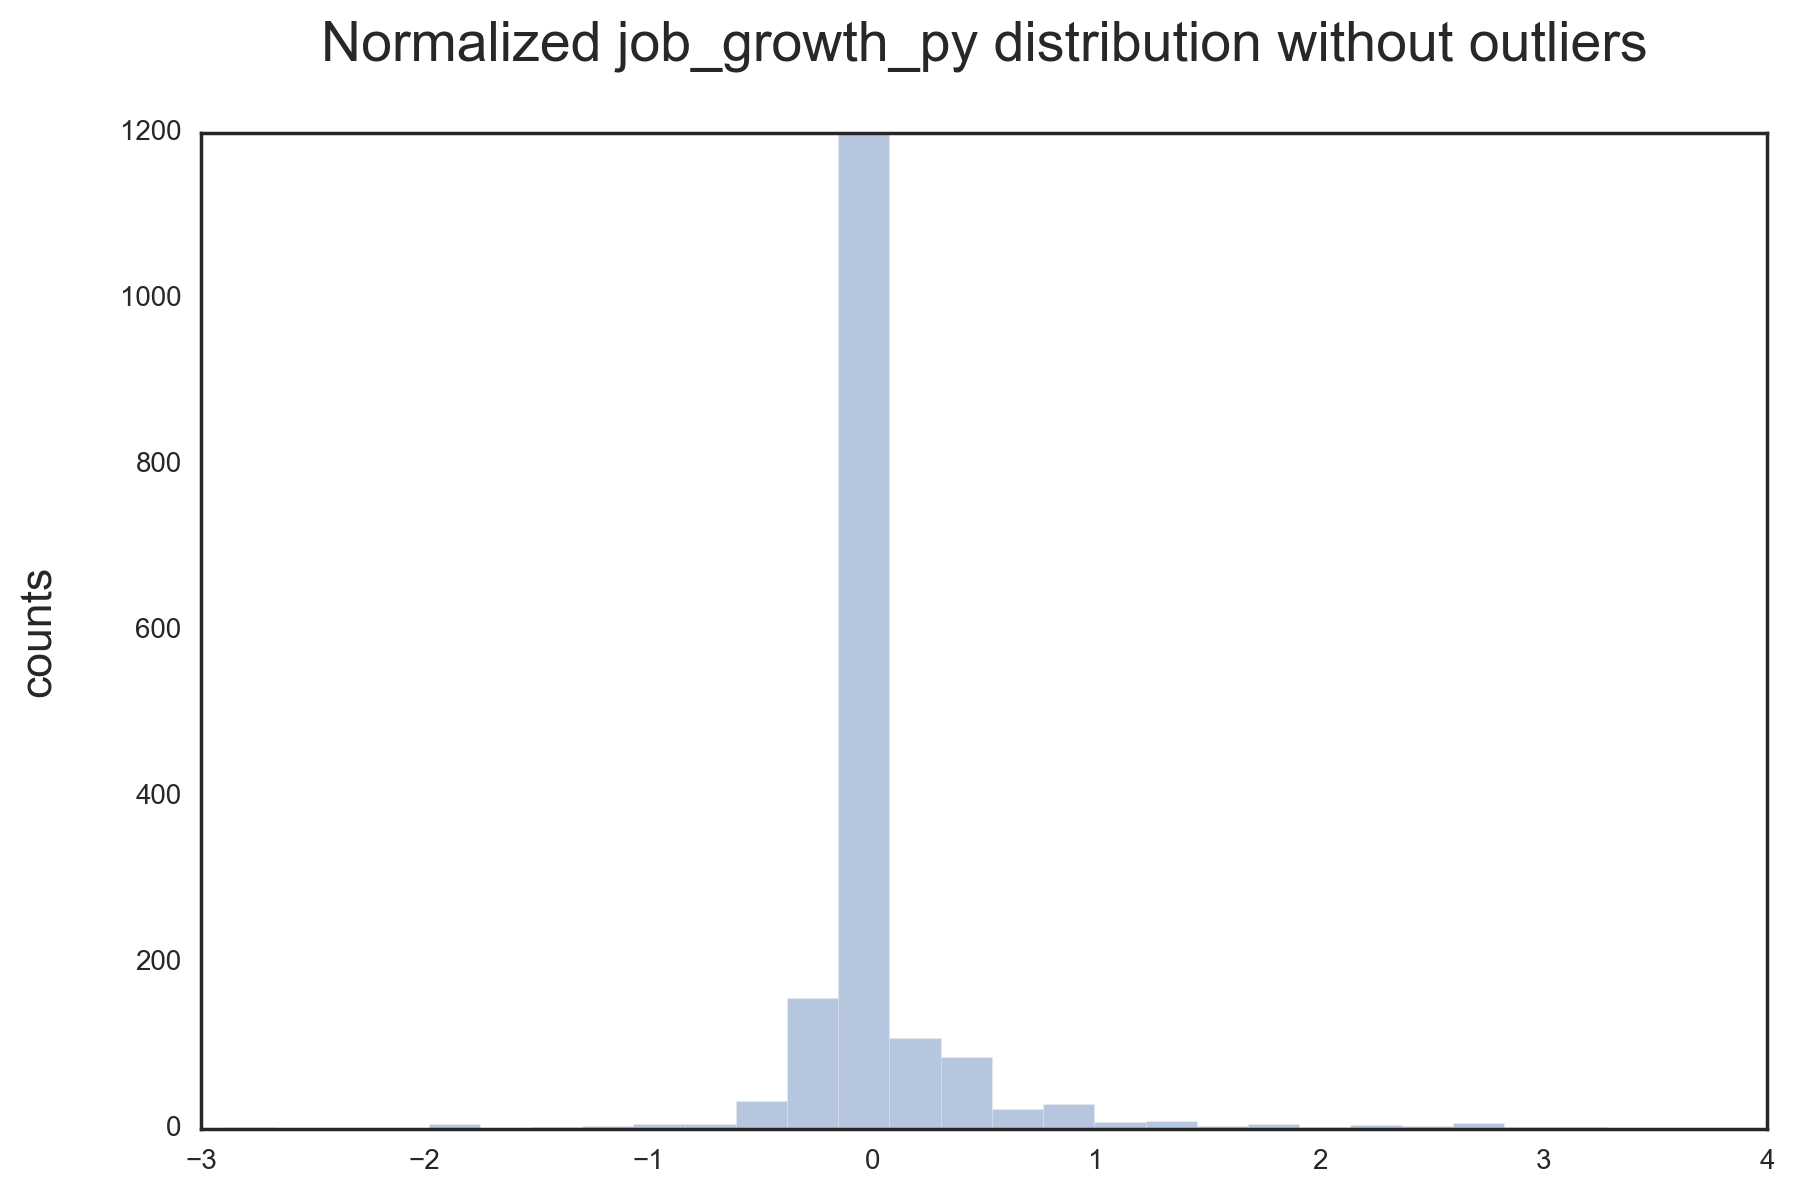

In [133]:
## The shape of the distribution doesn't change.
## Time to get rid of some outliers (choosing to remove any values more than 4 standard 
## deviations away from the mean in this case).

outlier_mask = (np.abs(job_growth_py_norm) < 4)
print len(job_growth_py_norm)
job_growth_py_norm_no_outliers = job_growth_py_norm[outlier_mask]
print len(job_growth_py_norm_no_outliers)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax = sns.distplot(job_growth_py_norm_no_outliers, bins=30, hist=True, kde=False,
                  ax=ax)

ax.set_ylabel('counts\n', fontsize=16)
ax.set_title('Normalized job_growth_py distribution without outliers\n', fontsize=20)

plt.show()

In [134]:
bang1.job_growth_py.describe()

count    1714.000000
mean        0.331146
std         2.184572
min       -23.000000
25%         0.000000
50%         0.000000
75%         0.265789
max        65.384615
Name: job_growth_py, dtype: float64

In [135]:
## I'm going to create a separate dataframe of a smaller number 
## of columns that only includes possible predictors of job creation.

bang2 = bang1[["slno", "or", "nob", "gnd", "dist", "legal_status", "num_sal_workers_atbeg", 
                 "owner_hrs_perweek", "num_daily_workers_atbeg", "num_unpaid_workers_atbeg", "owner_sex", 
                 "children_in_hh", "owner_age", "num_prior_jobs", "mny_lender_ever", 
                 "value_owned_biz_assets", "new_prod_serv_last_3yrs", "improv_prod_last_3yrs", 
                 "improv_process_last_3yrs", "yrs_in_op_when_took_over", "check_prices", "unofficial_TIN_cost", 
                 "check_products", "neg_w_supplier", "outofstock_freq", "have_recrdkping_syst", 
                 "sell_on_credit_dumm", "sales_goal_dumm", "considered_getting_TIN", 
                 "if_free_would_get_TIN", "job_growth_py"]] 

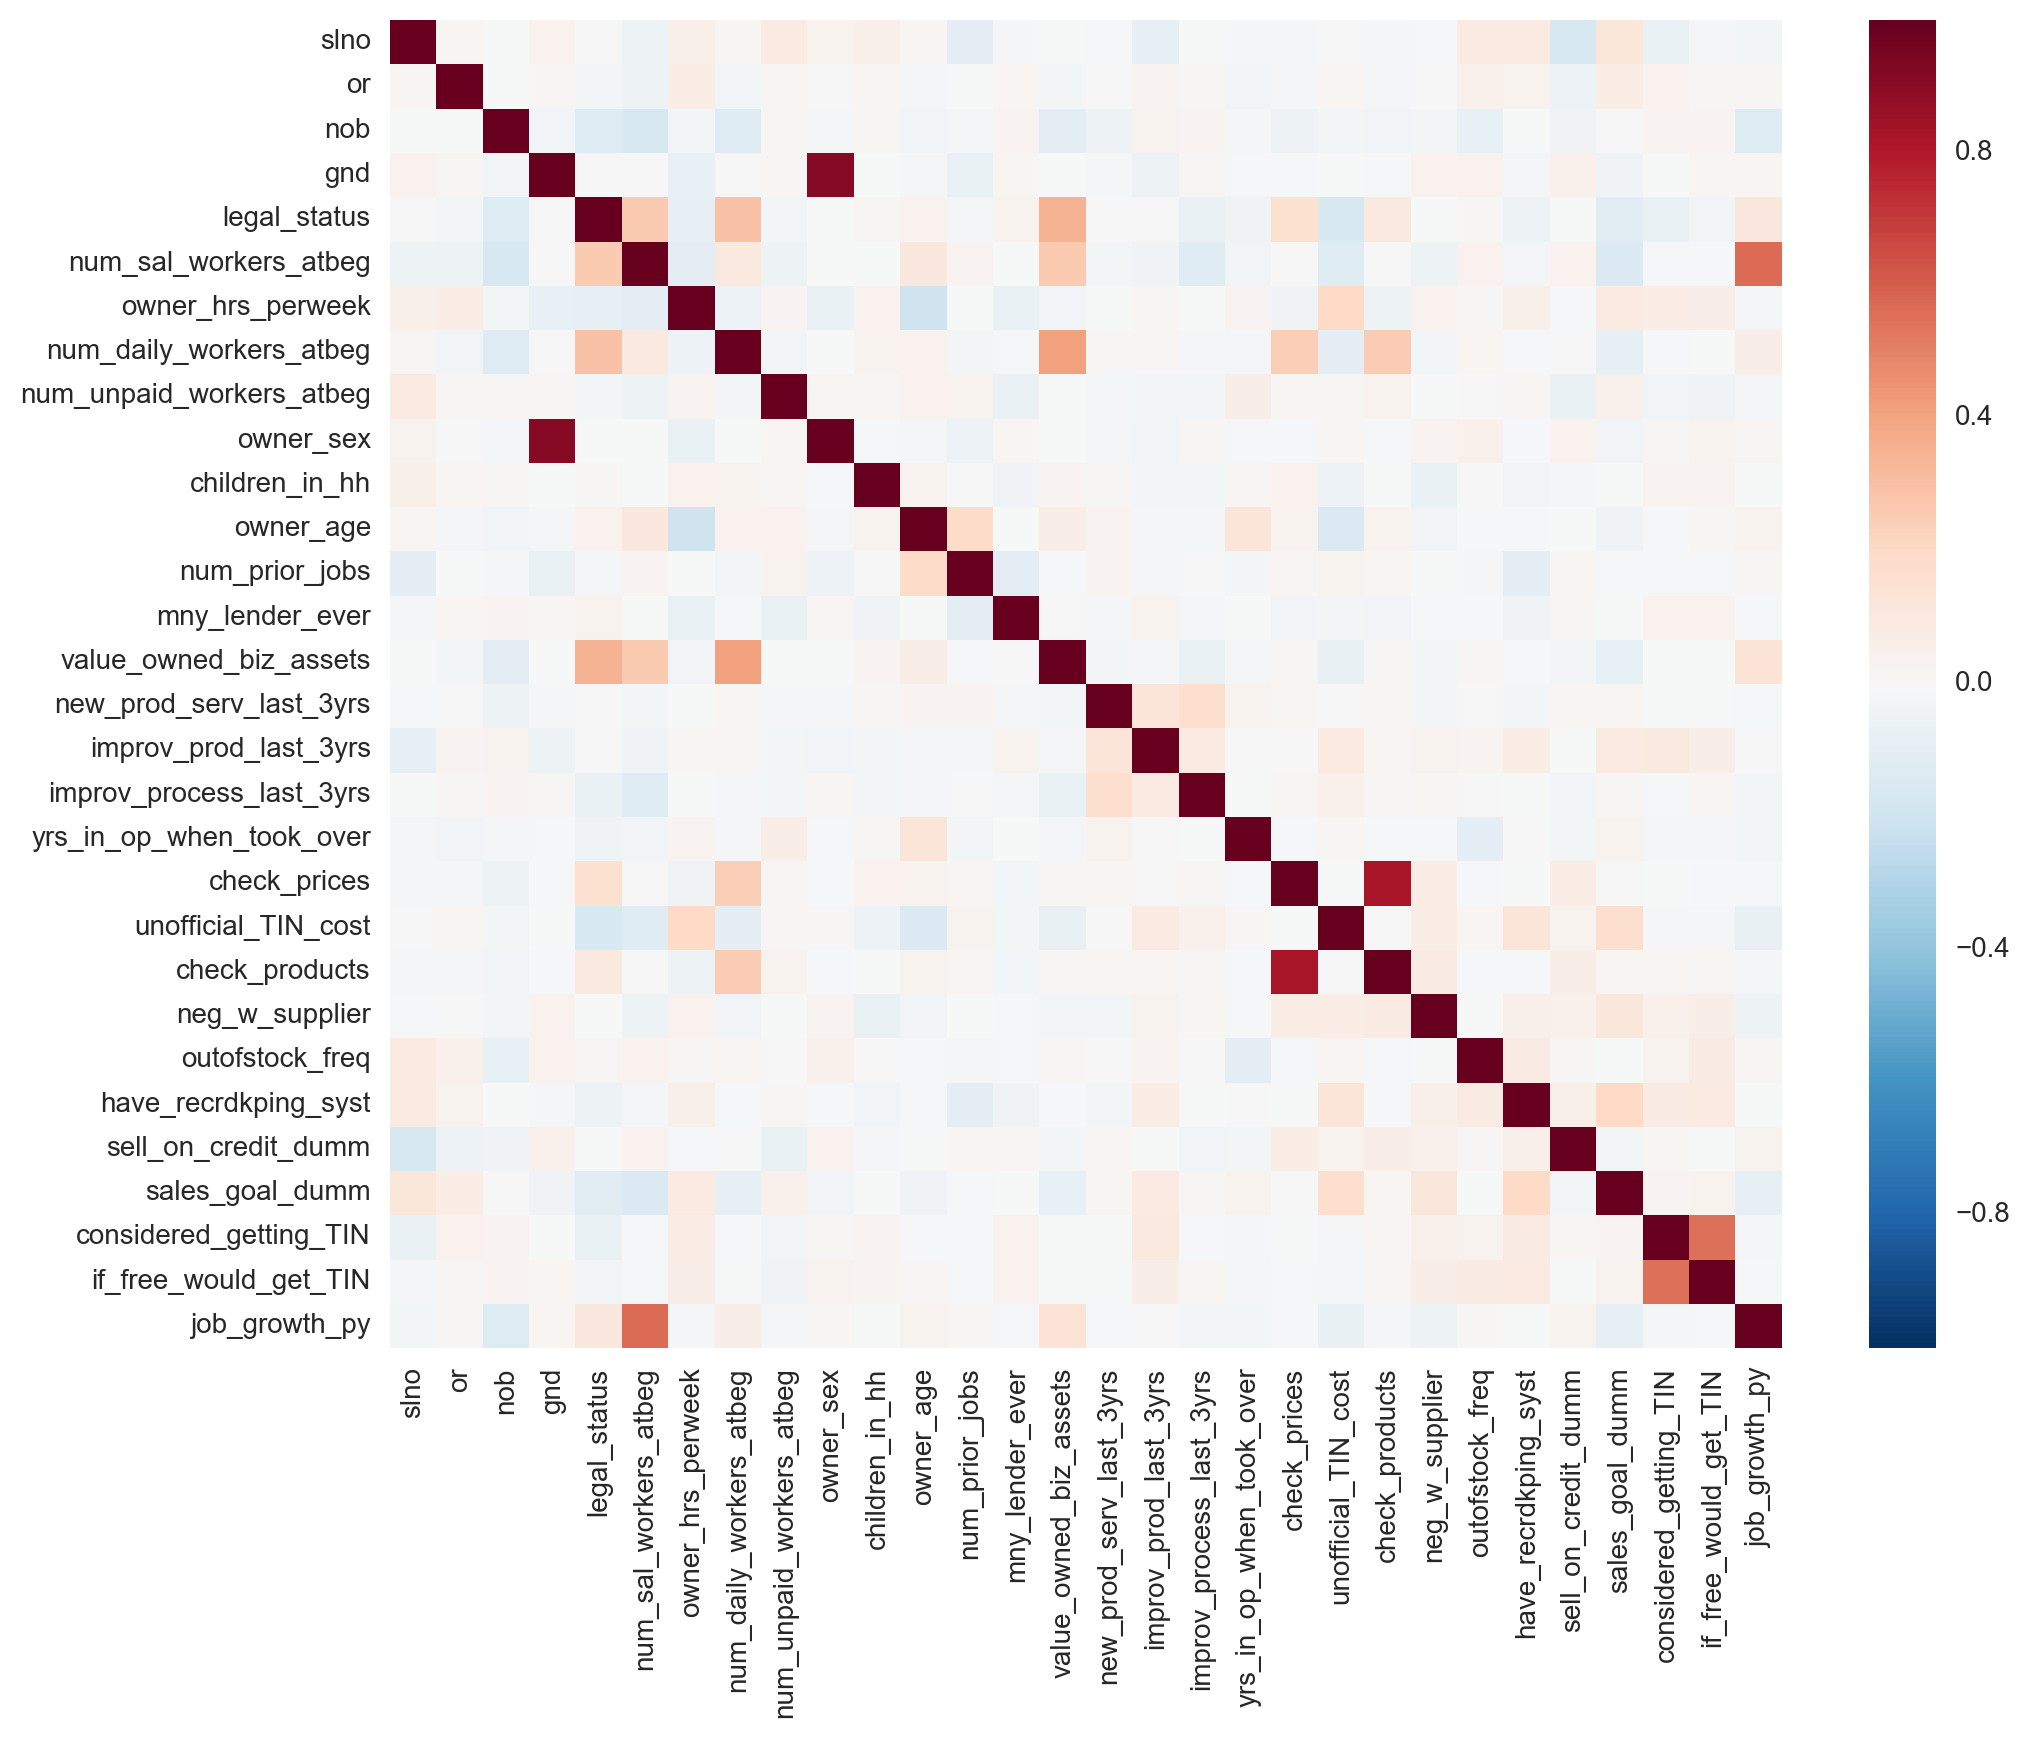

In [136]:
## Code adapted from Mario Carillo's Full Analysis notebook

fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(bang2.corr(), ax=ax)
plt.show()

The key column to look at in the above heatmap is the last column on the right (the job_growth_py variable). As you can see, there is not much that is highly correlated with this, aside from the number of salaried workers at the beginning variable, which is intuitive. Legal status may be the most interestingly variable that shows a positive correlation with job growth.

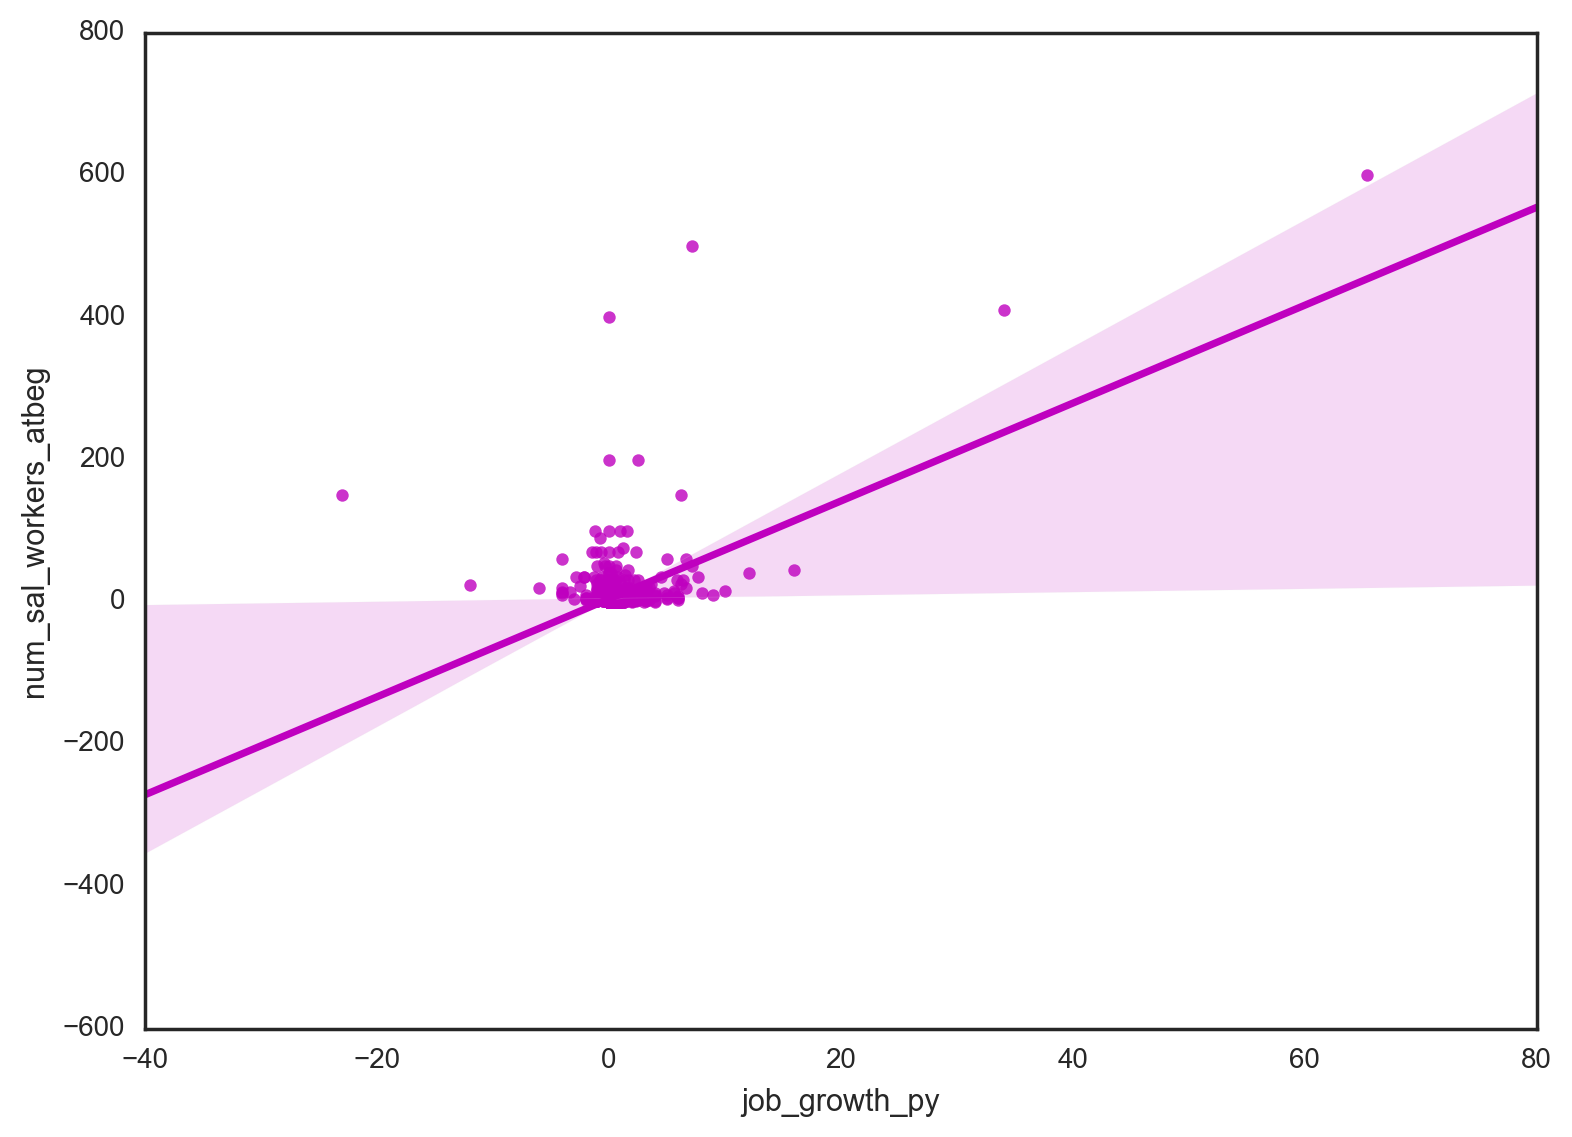

In [137]:
## Plotting the relationship between job growth per year and number of
## salaried workers the business had when it started.

sns.regplot(bang2.job_growth_py, bang2.num_sal_workers_atbeg, color='m')

Not surprisingly, these two are correlated, meaning that starting with
a higher number of employees is associated with then creating more jobs
at a higher rate in the future. However, this result looks to be driven
by some outliers. I am only interested in exploring data on small
informal firms, so I am going to drop all firms that started with over
99 salaried workers. 

In [138]:
bang2 = bang2[(bang2.num_sal_workers_atbeg < 100)]

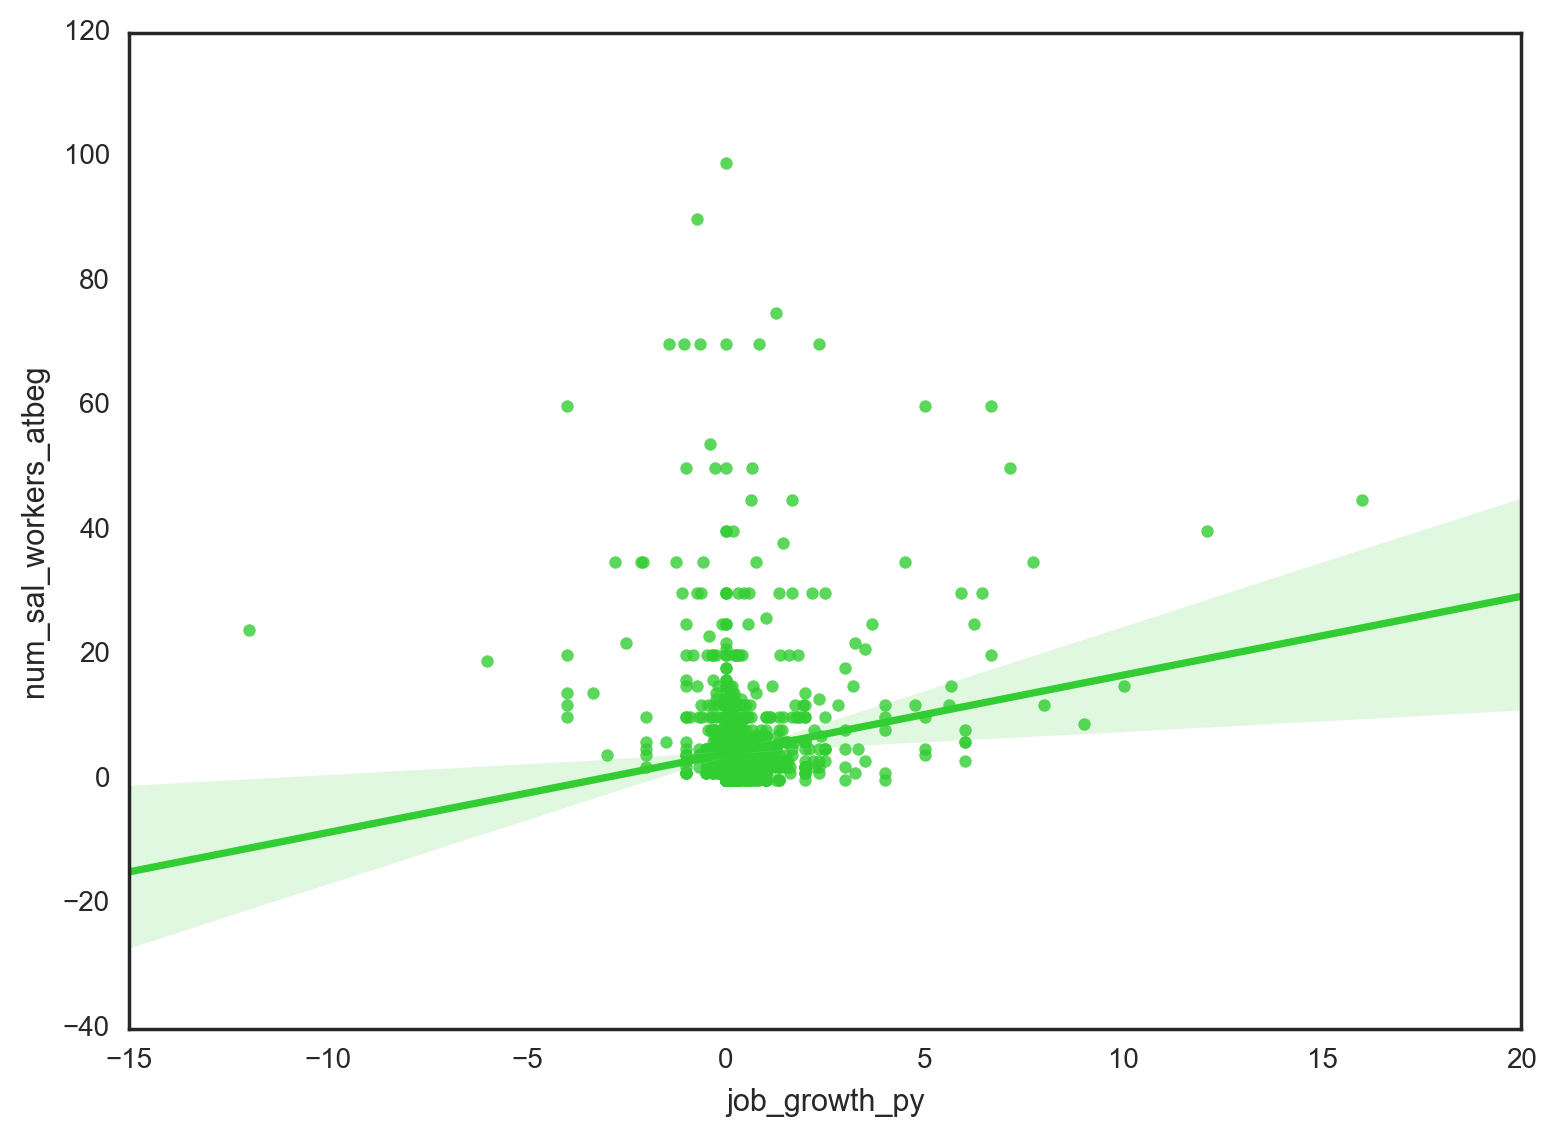

In [139]:
## What does that relationship look like now?

sns.regplot(bang2.job_growth_py, bang2.num_sal_workers_atbeg, color='limegreen')

In [140]:
## Still positive, but now we know that this correlation is not driven by 
## firms that started with more than 99 salaried employees. 

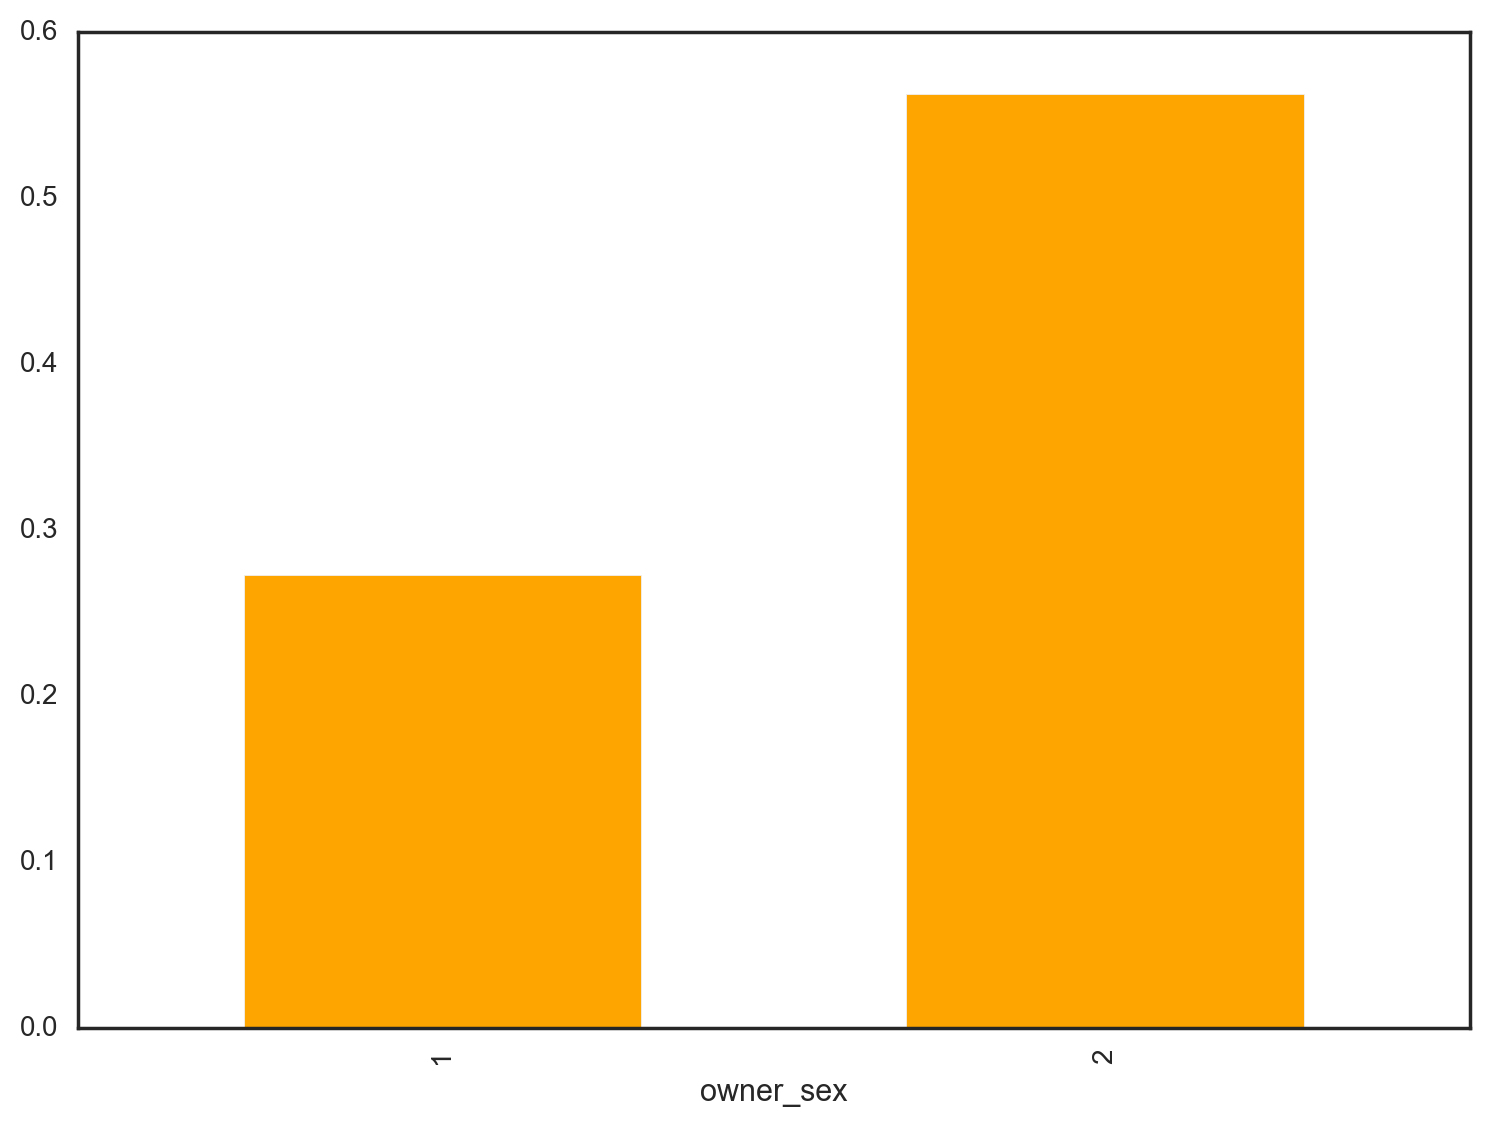

In [141]:
## Looking to see how job growth might be different by the principal business
## owner's gender.

bang2.groupby(['owner_sex'])['job_growth_py'].mean().plot(kind="bar", color=["orange"], width=0.6)
plt.show()

There seems to be quite a big gap in job creation rates in firms headed 
by males (1) and those headed by females (2). Just looking at this graph
it appears as though female-run businesses create many more jobs than 
male-run businesses. Before making any conclusions, I am going to check if the sample is evenly split among male and female owned businesses.

In [142]:
bang2['owner_sex'].value_counts()

1    1673
2      30
Name: owner_sex, dtype: int64

Not even close. The remaining sample only has 30 female-owned businesses
out of 1703! So, we shoud not take the difference in job growth rate between genders very seriously.

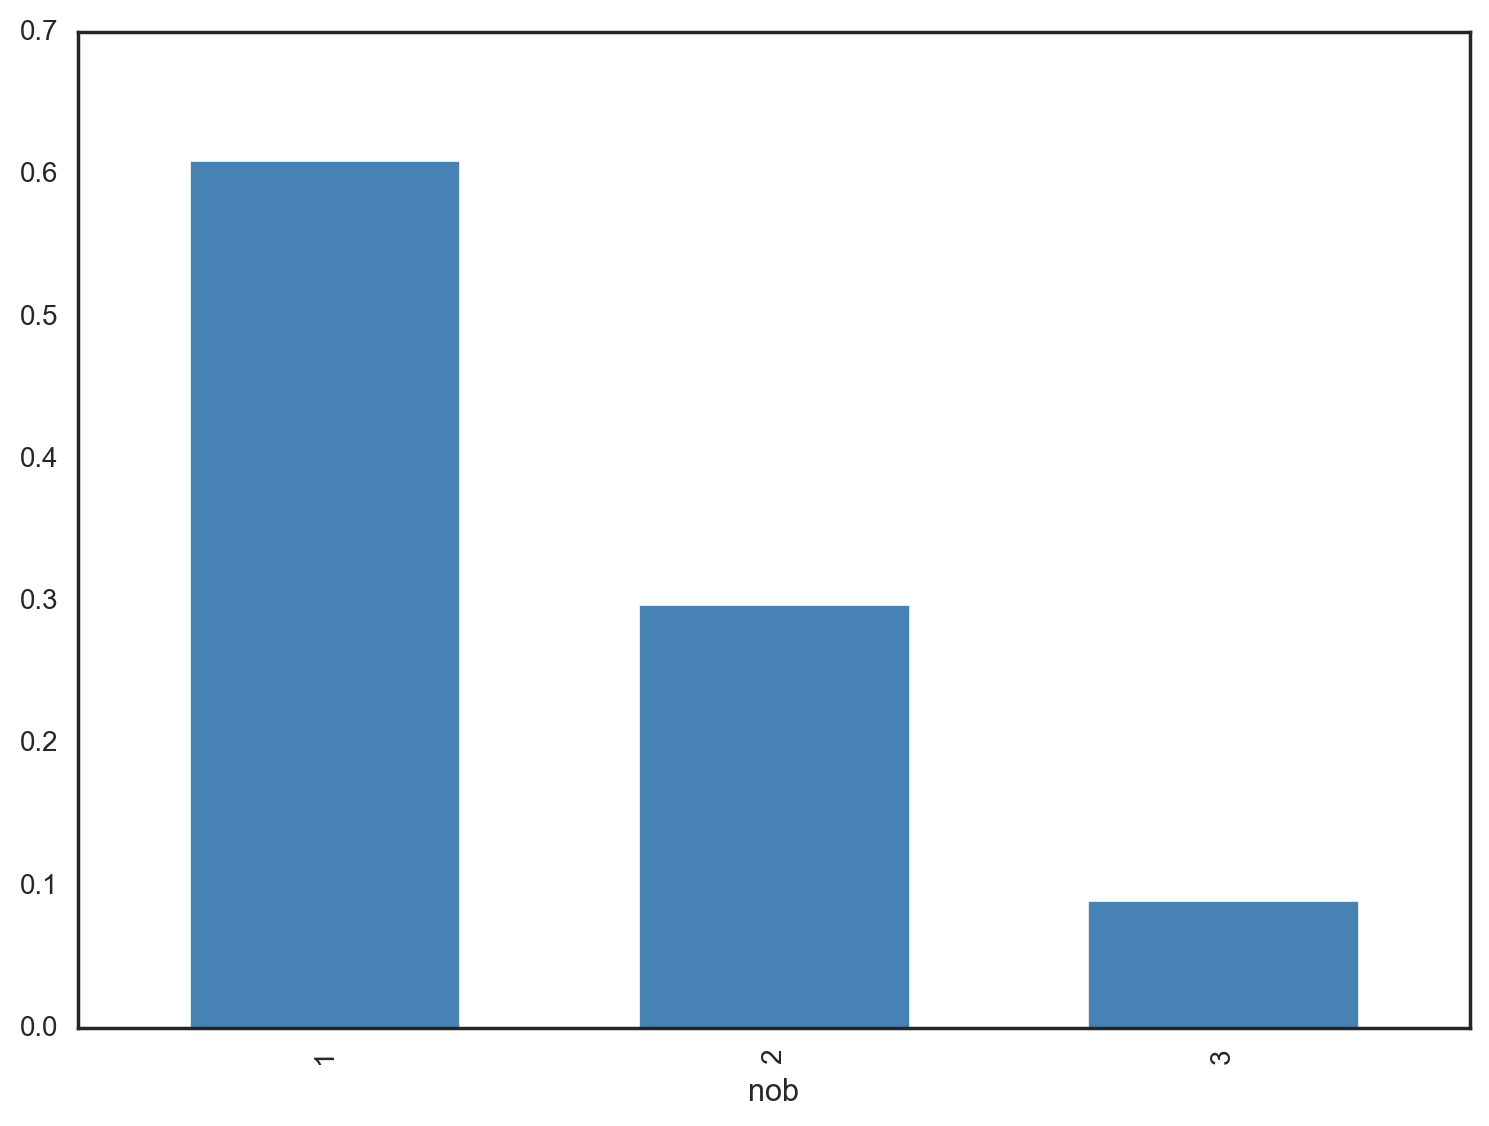

In [143]:
## It will also be important to see how rates of job creation 
## differ by the broad nature of the business 
## (trade, manufacturing, or services)?

bang2.groupby(['nob'])['job_growth_py'].mean().plot(kind="bar", color=["steelblue"], width=0.6)
plt.show()

Interesting. This bar chart above shows that rates of job growth are highest in the manufacturing sector, followed by services, and finally by trade. This is also to be expected, given that the heatmap above shows a strong correlation between the value of the businesses assets and its rate of job creation. It follows intuition that manufacturing sector businesses generally require more startup capital than firms that simple trade goods (I'll run another bar chart below to see if this is actually the case). 

The graph above is very telling, even if it only reconfirms what we know about development: that industrialization is key to growth. Those informal firms who operate in the manufacturing sector have a much higher job creation rate than informal simple trade or service industry firms. 

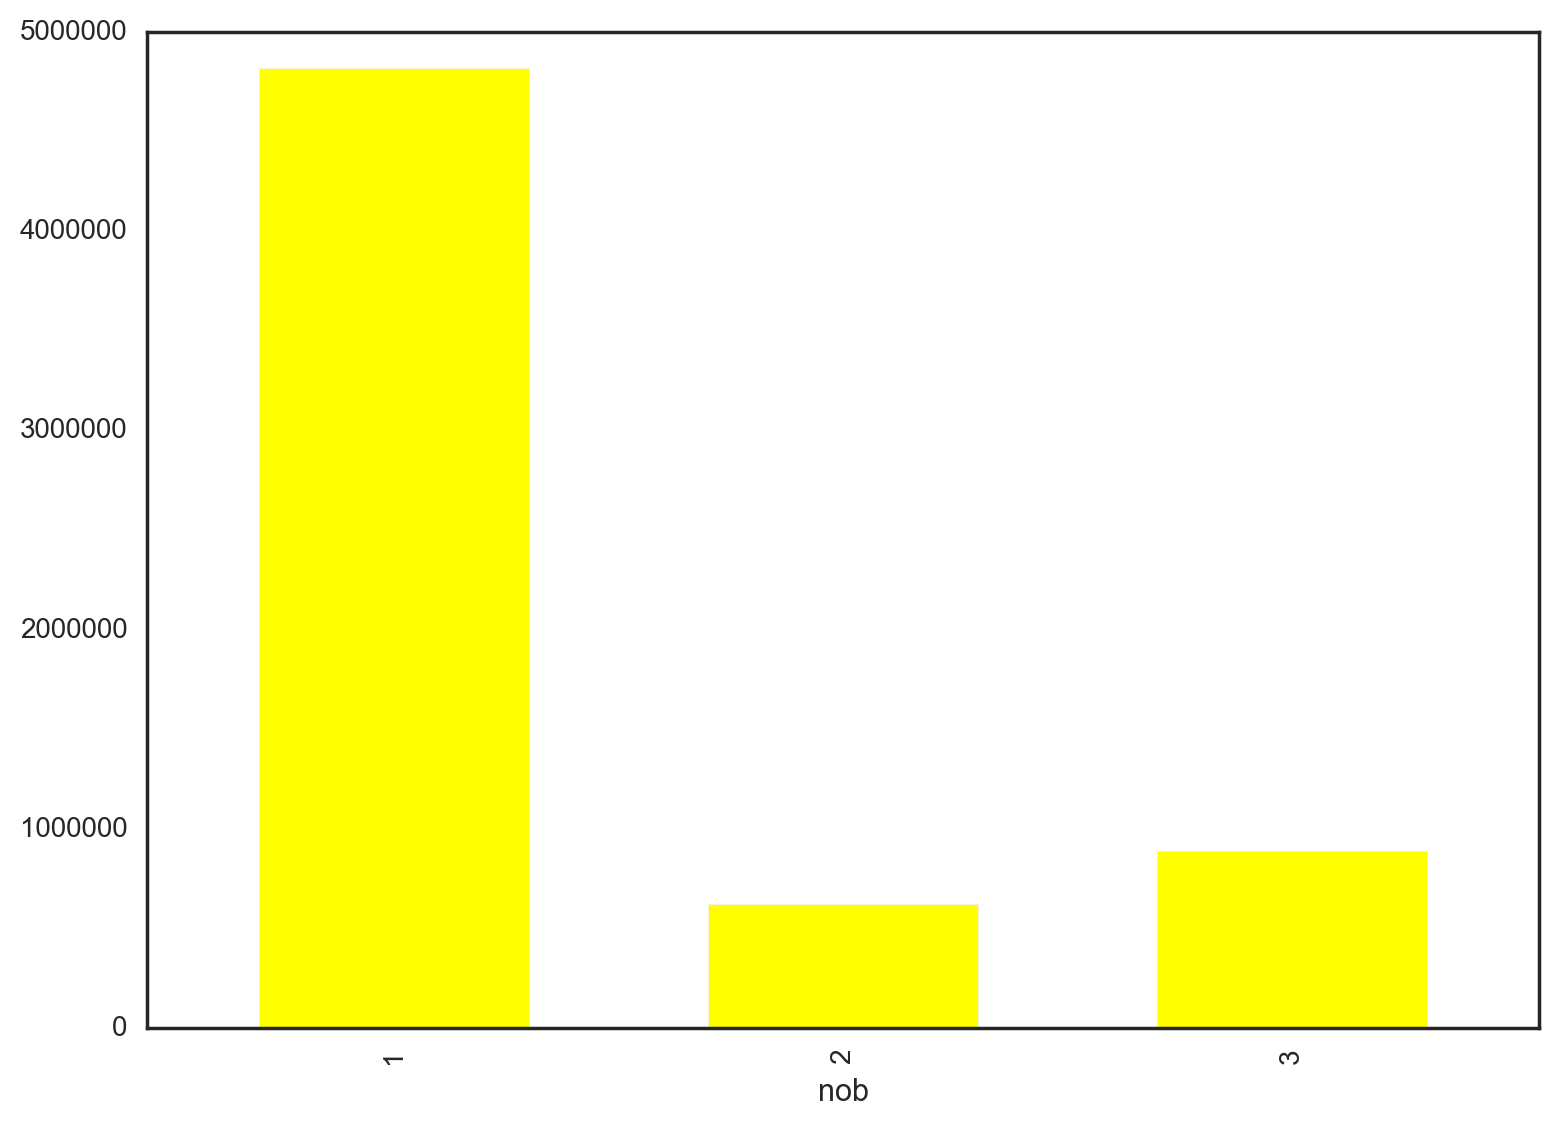

In [144]:
bang2.groupby(['nob'])['value_owned_biz_assets'].mean().plot(kind="bar", color=["yellow"], width=0.6)
plt.show()

Yes. The chart above does confirm that manufacturing businesses do in fact have many more assets. 

Before running a set of predicitve models I am going to do another heatmap with the new dataframe (only firms with less than 100 employees) to see if it has impacted any of the correlations we saw earlier between job creation rate and any other predictors. 

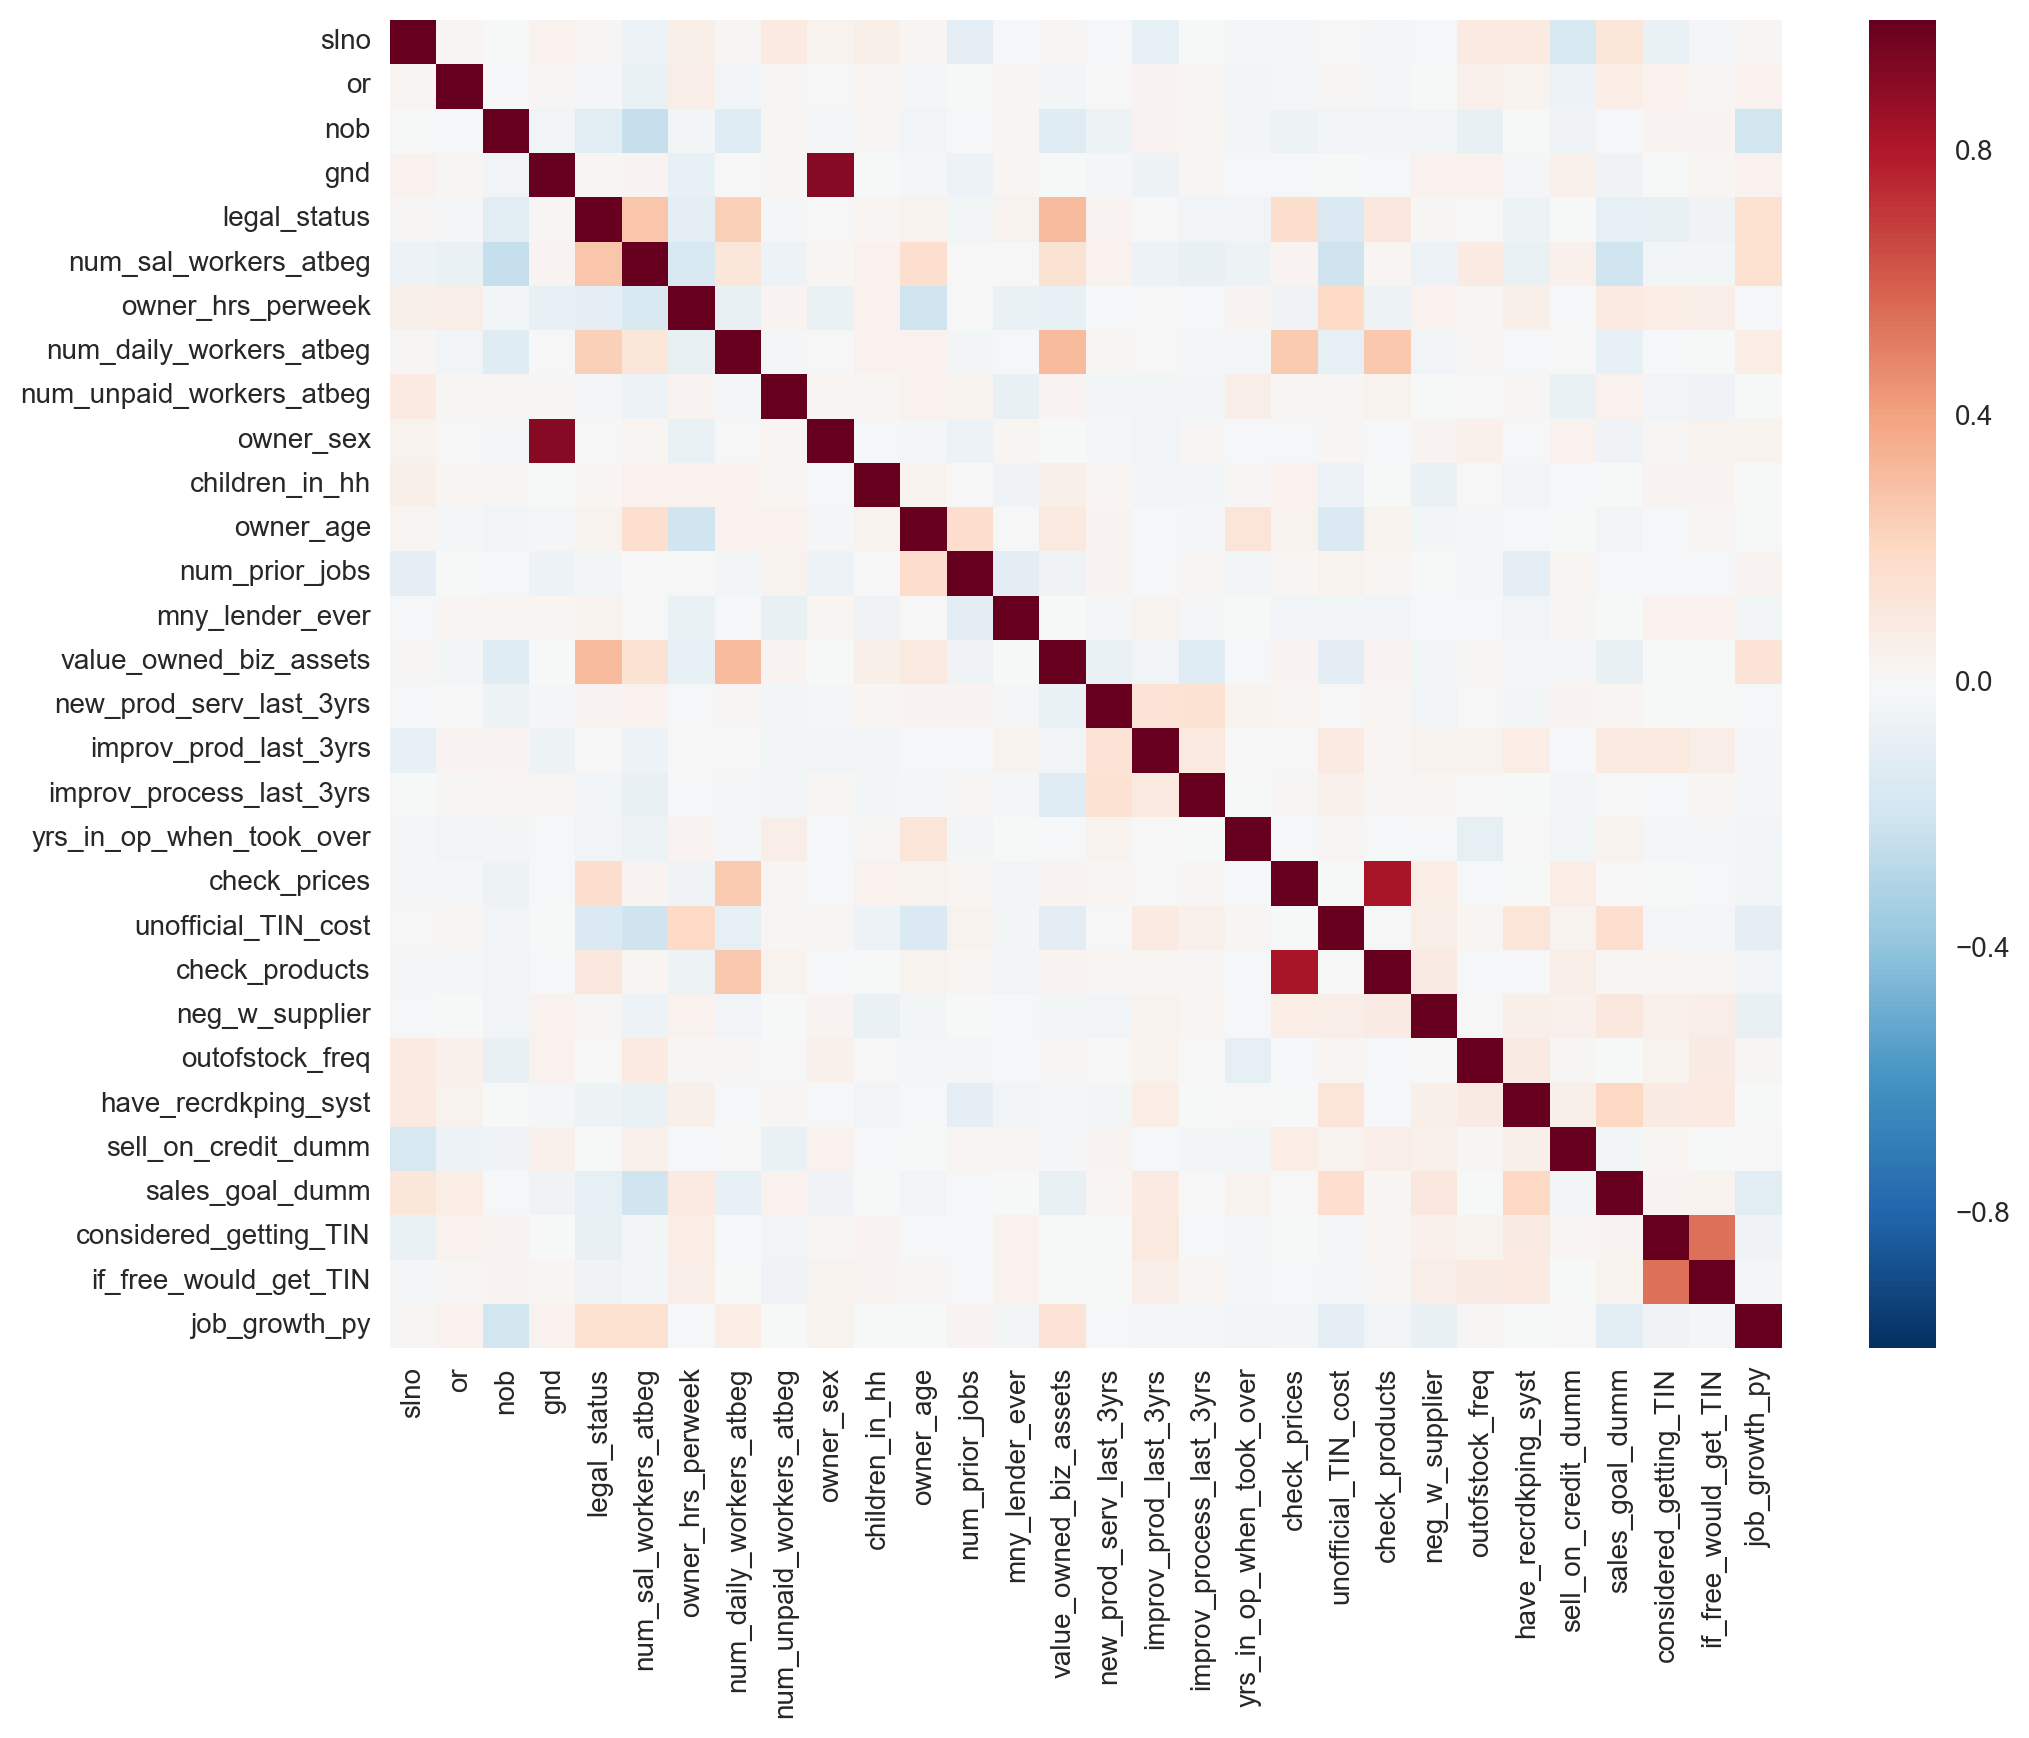

In [145]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(bang2.corr(), ax=ax)
plt.show()

The heatmap looks similar except the magnitude of the positive correlation between job_growth_py and number of salaried workers at the beginning of the business' operations is now much smaller. 

Now, I will start making some predictions to try to see what variables within this dataset (if any) might be able to predict which firms will be able to create jobs at a higher rate than others. 

Given the manageable size of this dataset I think that running through a series of regularization methods is a good starting point for this analysis. 

In [146]:
##Defining y as job_growth_py (my main outcome variable)
y = bang2['job_growth_py'] 
print type(y)

##Defining predictors, X
## I am choosing these variables to be my X's for one of three reasons: Either
## they represent factors that can be controlled by the business owner, they
## are variables related to my two original hypotheses, or they show a somewhat
## positive correlation on the above heatmap.

X = bang2[['value_owned_biz_assets', 'owner_age', 'legal_status', 'num_sal_workers_atbeg', 'num_daily_workers_atbeg', 'owner_hrs_perweek', 'new_prod_serv_last_3yrs', 'improv_prod_last_3yrs', 'improv_process_last_3yrs', 'check_prices', 'check_products', 'unofficial_TIN_cost', 'have_recrdkping_syst', 'outofstock_freq', 'neg_w_supplier', 'considered_getting_TIN', 'if_free_would_get_TIN', 'sales_goal_dumm']]
print type(X)

print X.shape, y.shape

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(1703, 18) (1703,)


In [147]:
## Code below from Mario Carillo's OLS_regularization demo notebook

## Standardizing X's

formula1 = '''
job_growth_py ~ value_owned_biz_assets, owner_age, legal_status, num_sal_workers_atbeg, num_daily_workers_atbeg, owner_hrs_perweek, new_prod_serv_last_3yrs, improv_prod_last_3yrs, improv_process_last_3yrs, check_prices, check_products, unofficial_TIN_cost, have_recrdkping_syst, outofstock_freq, neg_w_supplier, considered_getting_TIN, if_free_would_get_TIN, sales_goal_dumm -1
'''
formula1 = formula1.replace(",", "+")

In [148]:
from patsy import dmatrices
import patsy
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 

## Normalizing the X's

y, X = patsy.dmatrices(formula1, data=bang2, return_type="dataframe")
y = np.ravel(y)


## Using the "fit_transform" function to normalize the X design matrix
Xn = ss.fit_transform(X)

print (y.shape)
print ("\n=====\n")
print (Xn.shape)

(1703,)

=====

(1703, 18)


In [149]:
## Train-test splitting the data so that 30% of the data is in the test set. 
## Using random state = 10
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1192, 18) (1192,)
(511, 18) (511,)


Now that I have the data ready, I'm first going to run an OLS regression to have as a comparison for some of the regularization methods I will try afterwards. 

In [150]:
# Importing stats/regressions packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [151]:
# Defining a linear model 
lm = linear_model.LinearRegression() 

# Fitting a linear model
model = lm.fit(X, y)

# Predicting y, calling them predictions, printing the shape of predictions
predictions = lm.predict(X)
predictions.shape

(1703,)

In [152]:
## Check to see if there is a difference between the means for actual values
## of job_growth_py and the predictions of the model

print bang2['job_growth_py'].mean()
print predictions.mean()

0.278246165404
0.278246165404


In [153]:
## They are similar, which gives a vote of confidence to the overall model.
## This is somewhat surprising, given that not many of the RHS variables are
## strongly correlated with the dependent variable.

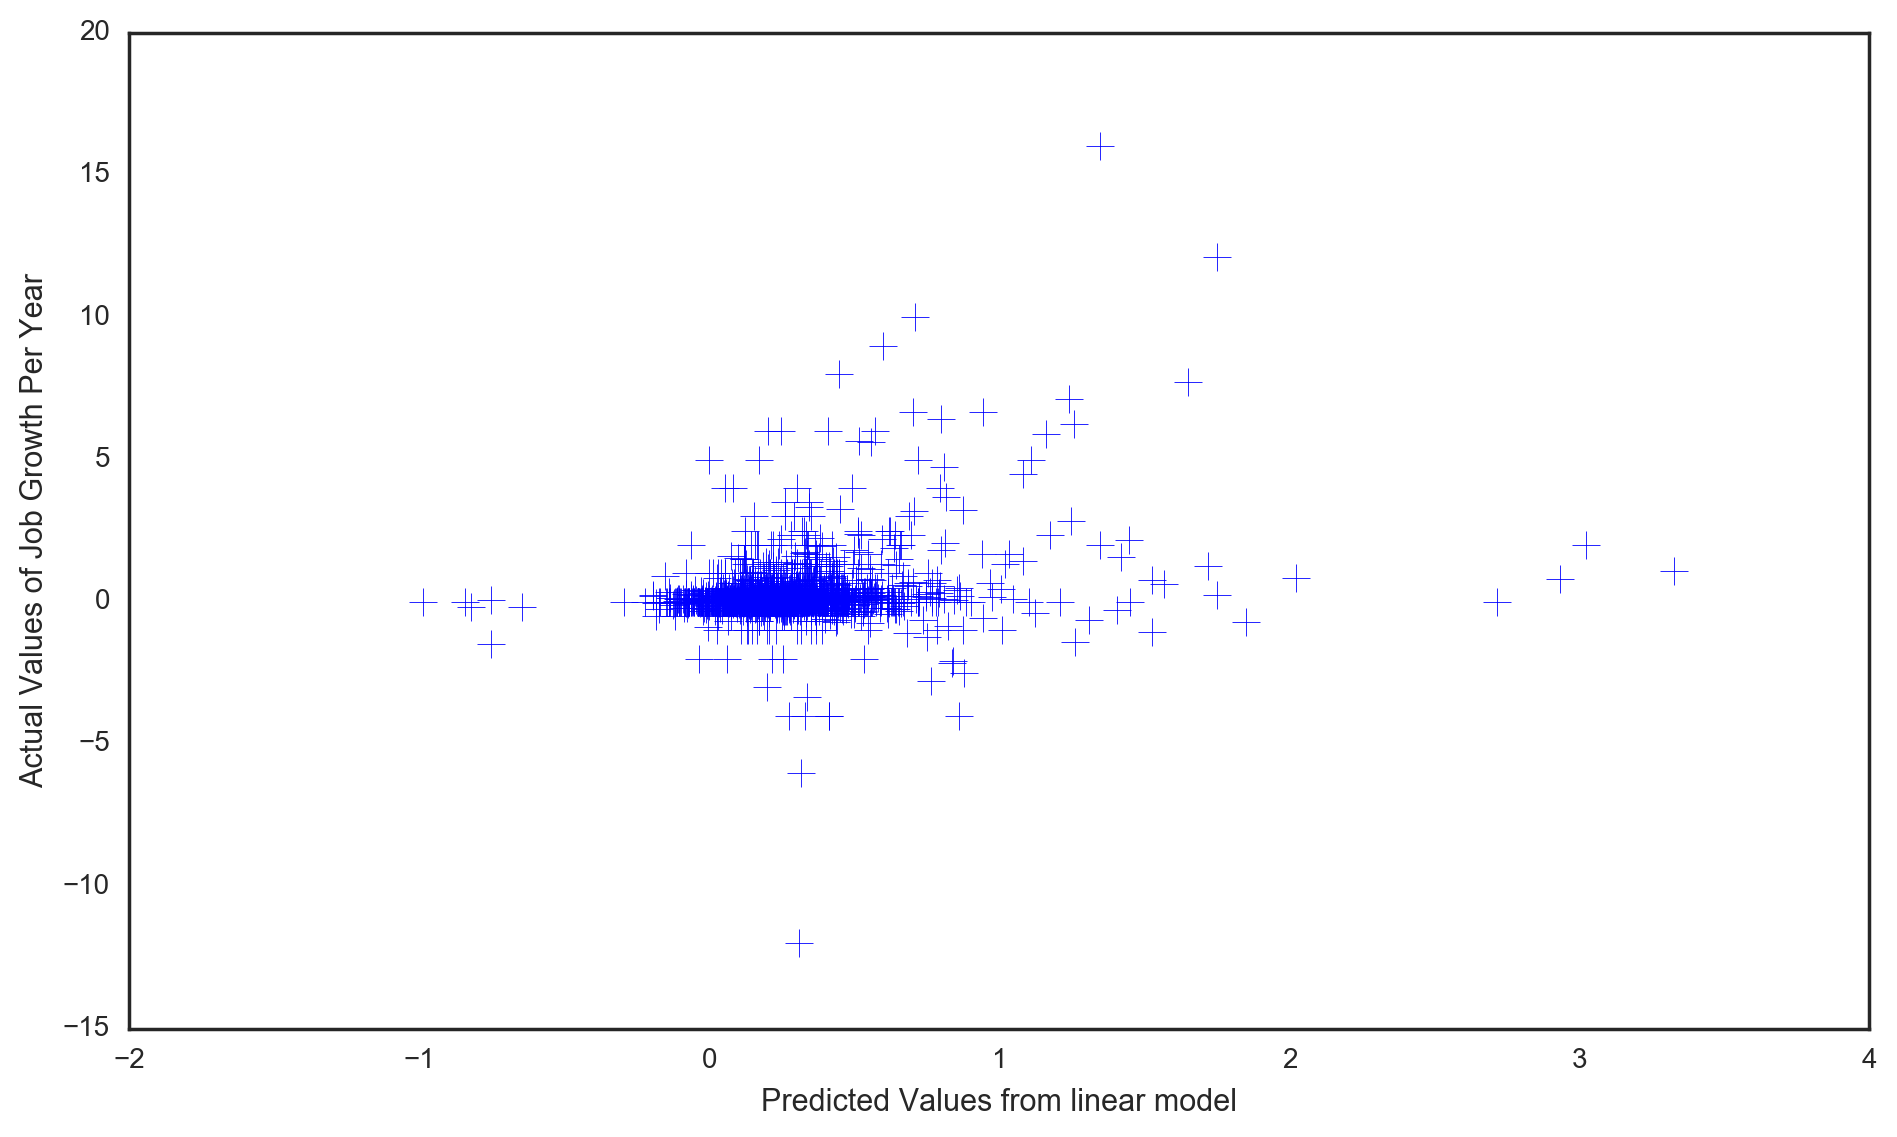

MSE: 1.19006009177


In [154]:
## Using code from Mario Carillo's University of San Francisco
## ECON-628 linear regression lab notebook (Spring 2017)

## Constructing a scatter plot of the model. Predicted values are on y axis and 
## y values are on x axis


fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from linear model")
plt.ylabel("Actual Values of Job Growth Per Year")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [155]:
## Printing R^2 for linear model
score_r2 = model.score(X, y)
score_r2

0.064030195305317394

In [156]:
## As expected, this OLS model has a very low R^2, given the RHS variables.

In [157]:
from sklearn.cross_validation import cross_val_score

In [158]:
## Cross-validating 10 times

linreg_scores = cross_val_score(lm, X_train, y_train, cv=10)

## Printing average R^2 after CV
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[-0.08315281  0.00728784  0.00245996 -0.05359941 -0.36017001  0.03270833
  0.04245856 -0.02549606  0.05412588  0.0468433 ]
Average R^2 OLS score: -0.034


In [159]:
## Printing estimated coefficients of the model.
model.coef_

array([  6.86471147e-09,  -3.84470601e-03,   2.50629333e-01,
         1.44827590e-02,   1.82280110e-03,   2.01411195e-03,
        -9.45982938e-02,   1.92514269e-02,   1.04903346e-01,
        -5.89269475e-03,  -2.05470368e-03,  -9.99374945e-05,
         9.27206913e-02,   2.58333170e-03,  -1.45578697e-01,
        -1.19830296e-01,   1.45378825e-02,  -1.52858624e-01])

In [160]:
## Printing the intercept of the model.
lm.intercept_

0.45204935349592712

In [161]:
## Importing these for later

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Now I'll run various regularization methods to see which are the best predictors of job creation per year among this sample of informal businesses.

The goal of the following methods will be to tackle the multicollinearity that is present in the OLS linear regression that I ran above. 

In [162]:
## Much of the code in this section taken from Mario Carillo's OLS Regularization demo

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [163]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

33312.9478793


In [164]:
## Implementing a Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fitting a Ridge regression
ridge.fit(X_train, y_train)
ytrain_pred_ridge = ridge.predict(X_train)
ytest_pred_ridge = ridge.predict(X_test)
print(ridge.coef_)
print "====\n"


## Cross validating ten times
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
## Printing the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))

[  8.86512026e-09  -5.30682592e-03   1.09743581e-03   1.34771555e-02
   7.61599480e-03   1.11594484e-03  -2.10866400e-04  -6.66322016e-05
   1.17778795e-04  -1.78912198e-03  -2.70306505e-03  -1.17141047e-04
   1.83741802e-04   5.15128147e-04  -5.81003823e-04  -6.87140393e-04
  -3.71938608e-04  -1.61256015e-03]
====

[ 0.02422665  0.07992967  0.02379048 -0.01398968 -0.34549494  0.01443119
  0.09107139 -0.01827324  0.04292306  0.05172112]
Average R^2 Ridge score: -0.005


In [165]:
print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_ridge),
        mean_squared_error(y_test, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_ridge),
        r2_score(y_test, ytest_pred_ridge)))

MSE - Ridge train: 1.330, test: 0.950
R^2 - Ridge train: 0.054, test: 0.008


In [166]:
## Now I will run a lasso regression

In [167]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

2151382.97624


................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  1

In [168]:
## Implementing a Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fitting the regression
lasso.fit(X_train, y_train)
ytrain_pred_lasso = lasso.predict(X_train)
ytest_pred_lasso = lasso.predict(X_test)
print(lasso.coef_)
print "====\n"

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

[  2.48918872e-09  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00]
====

[ 0.02568243 -0.00910218 -0.00140458  0.00661053 -0.01461673 -0.01882405
 -0.0007423  -0.01424935 -0.0009376   0.00188407]
Average R^2 Lasso score: -0.003


In [169]:
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_lasso),
        mean_squared_error(y_test, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_lasso),
        r2_score(y_test, ytest_pred_lasso)))

MSE - Lasso train: 1.394, test: 0.957
R^2 - Lasso train: 0.009, test: 0.000


In [170]:
## Now running an elastic net regression

l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(X_train, y_train)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

242524106.081
0.01


........................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   18.8s finished


In [171]:
##  Implementing an Elastic Net
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fitting the model
enet.fit(X_train, y_train)

ytrain_pred_enet = enet.predict(X_train)
ytest_pred_enet = enet.predict(X_test)
print(enet.coef_)
print "=====\n"

## Cross validating the scores and printing the mean of the scores
enet_scores = cross_val_score(enet, X_train, y_train, cv=10)
print enet_scores
print "Average R^2 ElasticNet score: %.3f" % (np.mean(enet_scores))

[  1.29498913e-09  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00]
=====

[ 0.0096149  -0.00910218 -0.00318826  0.00421482 -0.00869754 -0.01928026
 -0.0031374  -0.01478691 -0.00355075  0.00127837]
Average R^2 ElasticNet score: -0.005


In [172]:
print('MSE - ElasticNet train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_enet),
        mean_squared_error(y_test, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_enet),
        r2_score(y_test, ytest_pred_enet)))

MSE - ElasticNet train: 1.399, test: 0.957
R^2 - ElasticNet train: 0.005, test: -0.000


So far, it looks like the only feature that is a good predictor of 
job creation is the value of business assets that the business owner has. However, while its coefficients are positive in Ridge, Lasso, and Elastic Net regressions, they are still very close to zero. The three regularization methods that I tried to run all have very low R-squareds, which tells us that the variables on the LHS are not great predictors of job creation on the whole. 

I'm going to make use of other supervised methods that we have learned,
including decision trees and random forests, to see if I find similar
results for which variables are good predictors of job growth among 
informal businesses in Bangladesh. 

Much of the code in the section below is adapted from Mario Carillo's 
Random Forest Demo notebook

In [174]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

## crossvalidating 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [175]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    4.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [176]:
## dtr_best is the regression tree regressor with the 
## best parameters/estimators
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=7, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 5, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 7}


best score 0.0390411779293


In [177]:
## Here I am defining a function to print feature importance using best 
## models
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance  

In [178]:
feature_importance(X, dtr_best)

,feature,importance
3,num_sal_workers_atbeg,0.636782
0,value_owned_biz_assets,0.277168
5,owner_hrs_perweek,0.047933
2,legal_status,0.038117
11,unofficial_TIN_cost,0.000000
16,if_free_would_get_TIN,0.000000
15,considered_getting_TIN,0.000000
14,neg_w_supplier,0.000000
13,outofstock_freq,0.000000
12,have_recrdkping_syst,0.000000


In [179]:
## Predicting on the test data

y_pred_dtr= dtr_best.predict
y_pred_dtr

<bound method DecisionTreeRegressor.predict of DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=7, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')>

In [180]:
## Defining a function that calls the MSE and R^2 at once, using the name 
## of the method and calling the best model

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [181]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 1.14, test data: 1.16
R^2 Regression tree train data: 0.19, test data: -0.21


In [184]:
## Now running a random forest regression tree

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [185]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [186]:
## rfr_best = is the random forest regression tree regressor with best parameters/estimators
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 4, 'n_estimators': 100, 'max_depth': 5}


best score 0.0727164918401


In [188]:
feature_importance(X, rfr_best)

,feature,importance
3,num_sal_workers_atbeg,0.239659
0,value_owned_biz_assets,0.232415
1,owner_age,0.108706
4,num_daily_workers_atbeg,0.101227
5,owner_hrs_perweek,0.078754
2,legal_status,0.046994
11,unofficial_TIN_cost,0.041543
12,have_recrdkping_syst,0.018980
16,if_free_would_get_TIN,0.018907
17,sales_goal_dumm,0.017558


In [189]:
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 0.17258752,  0.23138456,  0.20752272,  0.18399689,  0.18296679,
        0.24060638,  0.16515443,  0.20525183,  0.18113912,  0.23995265,
        0.20621813,  0.17261432,  0.25540734,  0.23213015,  0.21712398,
        0.20752272,  0.17240671,  0.81466236,  0.1708998 ,  0.23724736,
        0.47964284,  0.17791583,  0.25957627,  0.19438476,  0.2655222 ,
        0.33876333,  0.20340082,  0.94367227,  0.17335992,  0.33929182,
        0.18018624, -0.04952755,  0.20788928,  0.19112043,  0.43115246,
        0.1708998 ,  0.19909548,  0.18296679,  0.22928414,  0.31850627,
        0.16613628,  0.22179837,  0.2772445 ,  0.1708998 ,  0.25436057,
        0.24150854,  0.23892594,  0.31786749,  0.25483073,  0.16894901,
        0.17979438,  0.17166914,  0.18210201,  0.17791583,  0.3404854 ,
        0.21727991,  0.18484534,  0.1959009 ,  0.00830343,  0.18347582,
        0.24740978,  0.18041621,  0.17796671,  0.16315229,  0.17791583,
        0.30771937,  0.23918644,  0.2568539 ,  0.21229367,  0.21

In [190]:
## Evaluating performance of the model

rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 1.01, test data: 0.93
R^2 Random Forest Regression tree train data: 0.28, test data: 0.03


## Technical Report on Findings

For this project I examined a set of variables related to business practices, firm owner attitudes toward formalization, firm characteristics, and firm owner characteristics to see which of these variables predict the rate of job creation within small (less than 100) informal firms in Bangladesh. I had two hypotheses at the outset of this exercise:1. Good business practices (having a record-keeping system in place, frequently checking competitors' prices, frequently improving business processes, etc.) will be relatively strong predictors of employment generation by informal businesses, and 2. Having positive attitudes toward business formalization will be a relatively weak predictor of employment generation by informal businesses.

To understand which variables are the best predictors of the rate of job creation amongst these firms, I used regularization methods including Ridge, Lasso, and Elastic Net regressions, as well decision tree and random forest classification methods. 

The reason for using Ridge, Lasso, and Elastic Net regressions, as alternatives to a simple OLS model was to ensure that the models accounted for the high levels of multicolinearity among the predictor variables. For example, the predictor variables included variables about firm owner attitudes toward formalization (dummy variable for having ever considered getting a tax identification number, perception of how expensive it would be to formalize by getting a tax identification number, and others), variables that measured different business practices (frequency of improving products over the past three years, frequency of improving business processes over the past 3 years, dummy variable for having a record keeping system in place, frequency with which the owner checks competitors’ prices, and others), as well as variables that describe firm characteristics when the business started (value of business assets, number of daily workers, number of salaried workers, and others). Many of these variables are obviously highly correlated with one another, and will therefore increase the variance of coefficient estimates and predicted values of the dependent variable, despite adding marginal predictive power to the models. Ridge regression for example, accounts for this problem by essentially putting a constraint on how large the coefficients can be. Lasso and Elastic Net regressions also account for the problem of high variance in a similar way, just adding slightly different constraints to the RSS minimization equation. 

In addition to these regularization methods, I used two classification methods as a check to see whether or not my results from the regularization methods were consistent. In both methods, I used the same dependent variable (rate of job creation per year within firms) and the same set of predictor variables. 

The results show that all of the models worked quite poorly given the predictor variables that were included. They had relatively small mean-squared-errors, but extremely small r-squared values, essentially showing that the group of predictor variables that were included has close to zero predictive power over the dependent variable of interest. This is not surprising, given that there are countless variables that could predict the rate of job creation within informal firms that were not included in this analysis.

The random forest method performed best among all of the models that I utilized. It had the smallest differences between MSE and r-squared between train and test among all of the models that I ran, and it also resulted in a MSE (on the test data) roughly similar to the other models (0.93) and the largest r-squared of any of the models. Among the X variables that were included in the model, the following two were the most important predictors of the annual rate of job creation within firms: 1. The number of salaried workers at the time the business began 2. The current value of business assets that the firm controlled.

Unfortunately, these results are not incredibly interesting. What it tells us is that firms that start out by employing more people, and those that have more capital have higher rates of job creation. This does not allow us to make any policy prescriptions other than that governments may want to consider supplying large amounts of capital to informal businesses up front if they hope that the informal sector will be an engine for increased opportunities for employment. Taken in sum, these results leave many questions about the drivers of job creation amongst informal firms, but it does show that neither business practices nor attitudes towards formalization seem to be strong predictors. 


## Non-technical report on Findings

Urbanization rates in the developing world are higher than they have ever been. By 2050, roughly two thirds of the world’s population will live in cities. Given this overwhelming influx of migrants, urban new-comers are often forced to work in informal businesses as a means of subsistence entrepreneurship. Research on urban entrepreneurship has repeatedly shown that these businesses rarely graduate into so-called “transformational” entrepreneurship, wherein the business owner employs workers outside of their immediate family. To better understand how these businesses can be engines for employment within these urban communities, we need to understand the factors that might predict higher rates of job creation. 

This project uses machine learning techniques to explore whether or not business practices (i.e. things like frequently checking competitor’s prices or having a record keeping system in place) or good attitudes toward paying taxes and entering into the so called “formal sector” can predict the success of informal businesses at creating jobs. 

The findings reveal that in fact neither of these features of informal business owners are good predictors of rates of job creation, but in fact that the best predictor of job creation is the original size of the business in terms of assets and number of employees. This is perhaps an unsurprising finding, but it suggests that those businesses who are given resources to start off large initially may be better able to provide employment opportunities for those in need of work in their communities. Further research into this challenge is desperately needed to help cities in the developing world tackle the need to sustain a rapidly growing population. 

